# ML2 2.3 - Complex Machine learning Models & Keras Part 2

### This script contains the following:

#### 1. Importing Libraries
#### 2. Cleaning Data
        Subset to a single Decade
#### 3. Random Forest
        Accuracy Model
        Feature Importance
        Feature Importance per Weather Station
        Bar Chart
#### 4. Subset Top 3 weather stations
#### 5. Random Forest: DUSSELDORF 
#### 6. Random Forest: MAASTRICHT
#### 7. Random Forest: BASEL
#### 8. Export

### 1. Importing Libraries


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from numpy import reshape
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# Importing Original Climate and Pleasant weather for DATE columns.
# Note: I'll perform the same tasks at ML2 2.2 to drop the columns and rename columns but, I'll keep the DATE column.

climateog = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts\ClimateWins\DataSet\ML1 - European Climate Assessment and Data Set Project.csv')

In [3]:
pleasantog = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts\ClimateWins\DataSet\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [7]:
# Creating Path for export

path = r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning'

In [9]:
path

'D:\\Career Foundry\\3) Data Specialization\\Machine Learning with Python\\Achievement 2 - Real-World Application of Machine Learning'

### 2. Cleaning Data

In [12]:
climateog

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1                  7               2.1            0.85   
1      19600102      1                  6               2.1            0.84   
2      19600103      1                  8               2.1            0.90   
3      19600104      1                  3               2.1            0.92   
4      19600105      1                  6               2.1            0.95   
...         ...    ...                ...               ...             ...   
22945  20221027     10                  1               2.1            0.79   
22946  20221028     10                  6               2.1            0.77   
22947  20221029     10                  4               2.1            0.76   
22948  20221030     10                  5               2.1            0.80   
22949  20221031     10                  5               2.1            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                     0             0.7  ...                     5   
1                     0             1.1  ...                     7   
2                     0             0.0  ...                     7   
3                     0             4.1  ...                     7   
4                     0             5.4  ...                     3   
...                 ...             ...  ...                   ...   
22945                 0             7.7  ...                     5   
22946                 0             5.4  ...                     5   
22947                 0             6.1  ...                     5   
22948                 0             5.8  ...                     5   
22949                 0             3.2  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0                   0.88             1.0003                       0.45   
1                   0.91             1.0007                       0.25   
2                   0.91             1.0096                       0.17   
3                   0.86             1.0184                       0.13   
4                   0.80             1.0328                       0.46   
...                  ...                ...                        ...   
22945               0.82             1.0142                       1.13   
22946               0.82             1.0142                       1.13   
22947               0.82             1.0142                       1.13   
22948               0.82             1.0142                       1.13   
22949               0.82             1.0142                       1.13   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                        0.34                    0                4.7   
1                        0.84                    0                0.7   
2                        0.08                    0                0.1   
3                        0.98                    0                0.0   
4                        0.00                    0                5.7   
...                       ...                  ...   

In [14]:
climateog.shape

(22950, 170)

In [16]:
pleasantog

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [18]:
pleasantog.shape

(22950, 16)

##### I'll drop coloumns from climateog while keeping the DATE coloumn.

In [21]:
climateog_drops = climateog.drop(columns=['MONTH',
 'BASEL_wind_speed',
 'BASEL_snow_depth',
 'DEBILT_wind_speed',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_snow_depth',
 'HEATHROW_snow_depth',
 'KASSEL_wind_speed',
 'LJUBLJANA_wind_speed',
 'MAASTRICHT_wind_speed',
 'MADRID_wind_speed',
 'MUNCHENB_snow_depth',
 'OSLO_wind_speed',
 'OSLO_snow_depth',
 'SONNBLICK_wind_speed',
 'VALENTIA_snow_depth', 
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',])

In [23]:
climateog_drops.shape

(22950, 133)

##### Next I'll repeat the task of filling in the missing columns for the three weather stations (KASSEL, MUNCHENB, STOCKHOLM).

In [26]:
# KASSEL is missing the cloud_cover observation, LJUBLJANA subs for KASSEL.

climateog_drops['LJUBLJANA_cloud_cover_KASSEL'] = climateog_drops['LJUBLJANA_cloud_cover']

In [28]:
# MUNCHENB is missing the pressure observation, SONNBLICK subs for MUNCHENB.

climateog_drops['SONNBLICK_pressure_MUNCHENB'] = climateog_drops['SONNBLICK_pressure']

In [30]:
# STOCKHOLM is missing the humidity observation, OSLO subs for STOCKHOLM.

climateog_drops['OSLO_humidity_STOCKHOLM'] = climateog_drops['OSLO_humidity']

In [32]:
climateog_drops.shape

(22950, 136)

##### I'll rename the copied columns and then reorganize the dataset so that the columns are with their respective weather stations.

In [35]:
# Renaming column Kassel cloud cover

climateog_drops.rename(columns = {'LJUBLJANA_cloud_cover_KASSEL' : 'KASSEL_cloud_cover'}, inplace = True)

In [37]:
# Renaming column Munchenb pressure

climateog_drops.rename(columns = {'SONNBLICK_pressure_MUNCHENB' : 'MUNCHENB_pressure'}, inplace = True)

In [39]:
# Renaming column Stockholm humidity

climateog_drops.rename(columns = {'OSLO_humidity_STOCKHOLM' : 'STOCKHOLM_humidity'}, inplace = True)

In [41]:
climateog_drops_rename = climateog_drops.columns.tolist()

In [43]:
climateog_drops_rename

['DATE',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_tem

In [45]:
# I'll reorder the columns so that the three new columns are paired with their appropriate weather station

climateog_reorder = ['DATE',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_cloud_cover',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_humidity',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']

In [47]:
climate_droporder = climateog_drops[climateog_reorder]

In [49]:
# Checking that KASSEL_cloud_cover, MUNCHENB_pressure and STOCKHOLM_humidity are paired with the correct weather station

climate_reorder_rename = climate_droporder.columns.tolist()

In [51]:
climate_reorder_rename

['DATE',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_tem

In [53]:
climate_droporder.shape

(22950, 136)

In [55]:
pleasantog_list = pleasantog.columns.tolist()

In [57]:
pleasantog_list

['DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

In [59]:
pleasantog.shape

(22950, 16)

##### I have all the data I need correctly reordered. I have 136 columns in climate_droporder becasue I have the DATE column still available. I have 16 columns in pleasantog because I have the DATE columns still available.

#### Subset to a single Decade


In [63]:
# Subsetting the data by a single decade

climate_1960s = climate_droporder[climate_droporder['DATE'].astype(str).str.contains('196')]

In [65]:
climate_1960s

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0     19600101                  7            0.85           1.018   
1     19600102                  6            0.84           1.018   
2     19600103                  8            0.90           1.018   
3     19600104                  3            0.92           1.018   
4     19600105                  6            0.95           1.018   
...        ...                ...             ...             ...   
3648  19691227                  8            0.80           1.018   
3649  19691228                  8            0.83           1.018   
3650  19691229                  5            0.82           1.018   
3651  19691230                  8            0.83           1.018   
3652  19691231                  8            0.80           1.018   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.32                 0.09             0.7   
1                       0.36                 1.05             1.1   
2                       0.18                 0.30             0.0   
3                       0.58                 0.00             4.1   
4                       0.65                 0.14             5.4   
...                      ...                  ...             ...   
3648                    0.18                 0.00             0.0   
3649                    0.18                 0.00             0.0   
3650                    0.67                 0.00             6.5   
3651                    0.18                 0.00             0.0   
3652                    0.18                 0.00             0.0   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                 6.5             0.8            10.9  ...   
1                 6.1             3.3            10.1  ...   
2                 8.5             5.1             9.9  ...   
3                 6.3             3.8            10.6  ...   
4                 3.0            -0.7             6.0  ...   
...               ...             ...             ...  ...   
3648             -3.1            -5.0            -2.2  ...   
3649             -3.5            -4.0            -2.2  ...   
3650             -3.7            -4.7            -1.7  ...   
3651             -3.9            -6.1            -2.9  ...   
3652             -3.1            -3.7            -2.5  ...   

      STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                    4.9                     5               0.88   
1                    5.0                     7               0.91   
2                    4.1                     7               0.91   
3                    2.3                     7               0.86   
4                    4.3                     3               0.80   
...                  ...                   ...                ...   
3648                 0.7                     6               0.84   
3649                 1.7                     6               0.73   
3650                 1.8                     7               0.74   
3651                -2.7                     5               0.70   
3652                -3.6                     6               0.71   

      VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                1.0003                       0.45                    0.34   
1                1.0007                       0.25                    0.84   
2                1.0096                       0.17                    0.08   
3                1.0184                       0.13                    0.98   
4                1.0328                       0.46                    0.00   
...                 ...                        ...                     ...   
3648             1.0239                       0.24                    0.00   
3649             1.0044                       0.33                    0.01   
3650             0.9972                       0.12                    0.00  

In [67]:
pleasant_1960s = pleasantog[pleasantog['DATE'].astype(str).str.contains('196')]

In [69]:
pleasant_1960s

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0     19600101                       0                          0   
1     19600102                       0                          0   
2     19600103                       0                          0   
3     19600104                       0                          0   
4     19600105                       0                          0   
...        ...                     ...                        ...   
3648  19691227                       0                          0   
3649  19691228                       0                          0   
3650  19691229                       0                          0   
3651  19691230                       0                          0   
3652  19691231                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
3648                          0                        0   
3649                          0                        0   
3650                          0                        0   
3651                          0                        0   
3652                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
3648                            0                          0   
3649                            0                          0   
3650                            0                          0   
3651                            0                          0   
3652                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
3648                        0                           0   
3649                        0                           0   
3650                        0                           0   
3651                        0                           0   
3652                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
3648                            0                        0   
3649                            0                        0   
3650                            0                        0   
3651                            0                        0   
3652                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                             0                      0   
1                             0                      0   
2                             0        

##### There are correct numbers of columns and rows in climate_1960s (3653 rows × 136 columns) and correct numbers of columns and rows in pleasant_1960s (3653 rows × 16 columns). I can proceed with the Random Forest.

### 3. Random Forest


In [73]:
# Create an 'X' matrix

X = climate_1960s
y = pleasant_1960s

In [75]:
X

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0     19600101                  7            0.85           1.018   
1     19600102                  6            0.84           1.018   
2     19600103                  8            0.90           1.018   
3     19600104                  3            0.92           1.018   
4     19600105                  6            0.95           1.018   
...        ...                ...             ...             ...   
3648  19691227                  8            0.80           1.018   
3649  19691228                  8            0.83           1.018   
3650  19691229                  5            0.82           1.018   
3651  19691230                  8            0.83           1.018   
3652  19691231                  8            0.80           1.018   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.32                 0.09             0.7   
1                       0.36                 1.05             1.1   
2                       0.18                 0.30             0.0   
3                       0.58                 0.00             4.1   
4                       0.65                 0.14             5.4   
...                      ...                  ...             ...   
3648                    0.18                 0.00             0.0   
3649                    0.18                 0.00             0.0   
3650                    0.67                 0.00             6.5   
3651                    0.18                 0.00             0.0   
3652                    0.18                 0.00             0.0   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                 6.5             0.8            10.9  ...   
1                 6.1             3.3            10.1  ...   
2                 8.5             5.1             9.9  ...   
3                 6.3             3.8            10.6  ...   
4                 3.0            -0.7             6.0  ...   
...               ...             ...             ...  ...   
3648             -3.1            -5.0            -2.2  ...   
3649             -3.5            -4.0            -2.2  ...   
3650             -3.7            -4.7            -1.7  ...   
3651             -3.9            -6.1            -2.9  ...   
3652             -3.1            -3.7            -2.5  ...   

      STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                    4.9                     5               0.88   
1                    5.0                     7               0.91   
2                    4.1                     7               0.91   
3                    2.3                     7               0.86   
4                    4.3                     3               0.80   
...                  ...                   ...                ...   
3648                 0.7                     6               0.84   
3649                 1.7                     6               0.73   
3650                 1.8                     7               0.74   
3651                -2.7                     5               0.70   
3652                -3.6                     6               0.71   

      VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                1.0003                       0.45                    0.34   
1                1.0007                       0.25                    0.84   
2                1.0096                       0.17                    0.08   
3                1.0184                       0.13                    0.98   
4                1.0328                       0.46                    0.00   
...                 ...                        ...                     ...   
3648             1.0239                       0.24                    0.00   
3649             1.0044                       0.33                    0.01   
3650             0.9972                       0.12                    0.00  

In [77]:
y

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0     19600101                       0                          0   
1     19600102                       0                          0   
2     19600103                       0                          0   
3     19600104                       0                          0   
4     19600105                       0                          0   
...        ...                     ...                        ...   
3648  19691227                       0                          0   
3649  19691228                       0                          0   
3650  19691229                       0                          0   
3651  19691230                       0                          0   
3652  19691231                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
3648                          0                        0   
3649                          0                        0   
3650                          0                        0   
3651                          0                        0   
3652                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
3648                            0                          0   
3649                            0                          0   
3650                            0                          0   
3651                            0                          0   
3652                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
3648                        0                           0   
3649                        0                           0   
3650                        0                           0   
3651                        0                           0   
3652                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
3648                            0                        0   
3649                            0                        0   
3650                            0                        0   
3651                            0                        0   
3652                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                             0                      0   
1                             0                      0   
2                             0        

In [79]:
# I'll drop the DATE column from X and y to allow the Random Forest to work with the data better.

X = X.drop(columns=['DATE'])

In [81]:
y = y.drop(columns=['DATE'])

In [83]:
X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                     7            0.85           1.018   
1                     6            0.84           1.018   
2                     8            0.90           1.018   
3                     3            0.92           1.018   
4                     6            0.95           1.018   
...                 ...             ...             ...   
3648                  8            0.80           1.018   
3649                  8            0.83           1.018   
3650                  5            0.82           1.018   
3651                  8            0.83           1.018   
3652                  8            0.80           1.018   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.32                 0.09             0.7   
1                       0.36                 1.05             1.1   
2                       0.18                 0.30             0.0   
3                       0.58                 0.00             4.1   
4                       0.65                 0.14             5.4   
...                      ...                  ...             ...   
3648                    0.18                 0.00             0.0   
3649                    0.18                 0.00             0.0   
3650                    0.67                 0.00             6.5   
3651                    0.18                 0.00             0.0   
3652                    0.18                 0.00             0.0   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                 6.5             0.8            10.9                     1   
1                 6.1             3.3            10.1                     6   
2                 8.5             5.1             9.9                     6   
3                 6.3             3.8            10.6                     8   
4                 3.0            -0.7             6.0                     8   
...               ...             ...             ...                   ...   
3648             -3.1            -5.0            -2.2                     8   
3649             -3.5            -4.0            -2.2                     8   
3650             -3.7            -4.7            -1.7                     8   
3651             -3.9            -6.1            -2.9                     8   
3652             -3.1            -3.7            -2.5                     8   

      ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0     ...                 4.9                     5               0.88   
1     ...                 5.0                     7               0.91   
2     ...                 4.1                     7               0.91   
3     ...                 2.3                     7               0.86   
4     ...                 4.3                     3               0.80   
...   ...                 ...                   ...                ...   
3648  ...                 0.7                     6               0.84   
3649  ...                 1.7                     6               0.73   
3650  ...                 1.8                     7               0.74   
3651  ...                -2.7                     5               0.70   
3652  ...                -3.6                     6               0.71   

      VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                1.0003                       0.45                    0.34   
1                1.0007                       0.25                    0.84   
2                1.0096                       0.17                    0.08   
3                1.0184                       0.13                    0.98   
4                1.0328                       0.46                    0.00   
...                 ...                        ...                     ...   
3648             1.0239                       0.24                    0.00   
3649  

In [85]:
y

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
...                      ...                        ...   
3648                       0                          0   
3649                       0                          0   
3650                       0                          0   
3651                       0                          0   
3652                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
3648                          0                        0   
3649                          0                        0   
3650                          0                        0   
3651                          0                        0   
3652                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
3648                            0                          0   
3649                            0                          0   
3650                            0                          0   
3651                            0                          0   
3652                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
3648                        0                           0   
3649                        0                           0   
3650                        0                           0   
3651                        0                           0   
3652                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
3648                            0                        0   
3649                            0                        0   
3650                            0                        0   
3651                            0                        0   
3652                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0        

##### Now with the DATE column removed from both X and y, I can proceed with changing the data to a numpy array and splitting it.

In [88]:
# Changing data from DataFrame to Numpy Array

X = np.array(X.iloc[:,X.columns!=135])
y = np.array(y)

In [90]:
X

array([[ 7.   ,  0.85 ,  1.018, ...,  8.5  ,  6.   , 10.9  ],
       [ 6.   ,  0.84 ,  1.018, ...,  8.9  ,  5.6  , 12.1  ],
       [ 8.   ,  0.9  ,  1.018, ..., 10.5  ,  8.1  , 12.9  ],
       ...,
       [ 5.   ,  0.82 ,  1.018, ...,  3.8  ,  2.5  ,  6.3  ],
       [ 8.   ,  0.83 ,  1.018, ...,  2.9  ,  1.2  ,  5.1  ],
       [ 8.   ,  0.8  ,  1.018, ...,  2.4  ,  1.5  ,  3.6  ]])

In [92]:
X.shape

(3653, 135)

In [94]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [96]:
y.shape

(3653, 15)

In [98]:
# Train & Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [100]:
# Train and Test Split Shapes

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922, 15)
(731, 135) (731, 15)


#### Accuracy Model

In [103]:
# Creating a RandomForest classifier

clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# Fit function is used to train the model using the training sets as parameters

clf.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
# Performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6032831737346102


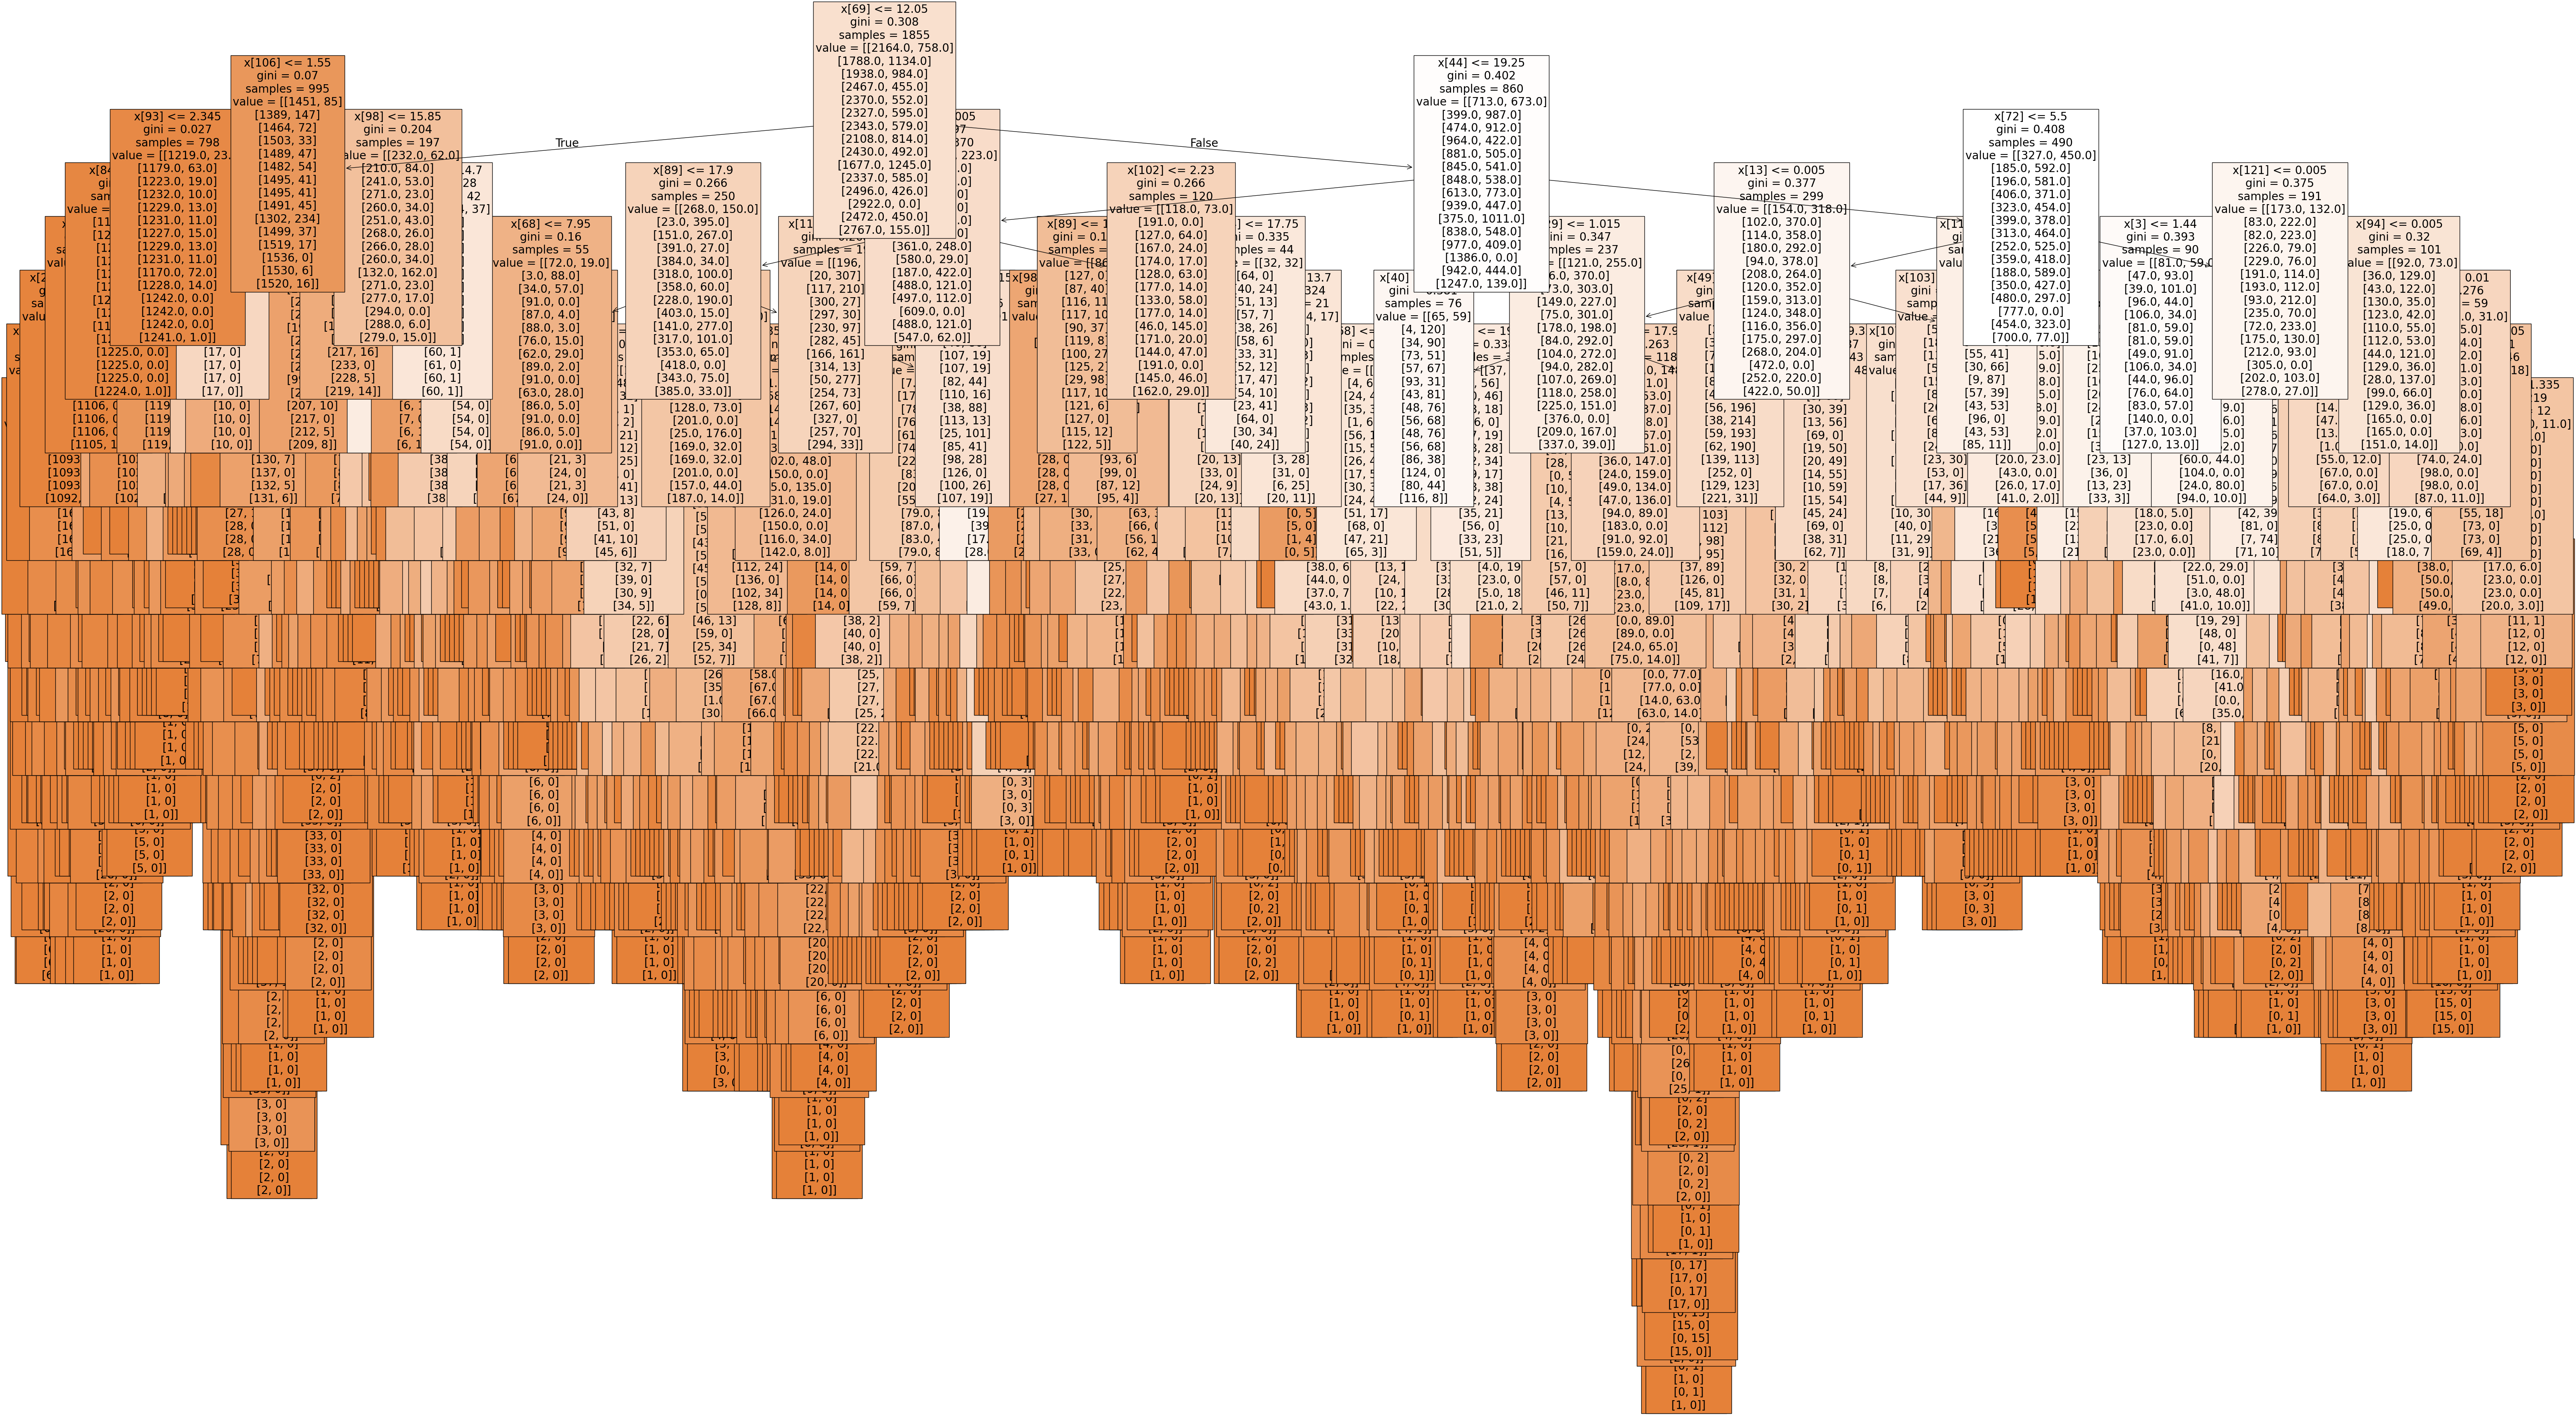

In [107]:
types = {0:'unpleasant', 1:'pleasant'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=types, filled=True);
fig.savefig("Climate_1960s Random Forest.png")

#### Feature Importance

##### Below I create a list from my Pandas DataFrame to pair with my numpy array to create the list I need for feature importance.

In [109]:
feature_names = climate_1960s.columns.tolist()

In [111]:
feature_names

['DATE',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_tem

In [113]:
feature_name_d = climate_1960s.drop(columns=['DATE'])

In [115]:
features = feature_name_d.columns.tolist()

In [117]:
features

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [119]:
# Creating a list of features importance

important = pd.Series(clf.feature_importances_, index = features)
important

BASEL_cloud_cover         0.003382
BASEL_humidity            0.002965
BASEL_pressure            0.000000
BASEL_global_radiation    0.003767
BASEL_precipitation       0.016351
                            ...   
VALENTIA_precipitation    0.002223
VALENTIA_sunshine         0.003244
VALENTIA_temp_mean        0.003920
VALENTIA_temp_min         0.002800
VALENTIA_temp_max         0.005473
Length: 135, dtype: float64

In [121]:
pd.set_option('display.max_rows', 140)

In [123]:
# Looking at all the important features individually 

important.sort_values(ascending=False)

MAASTRICHT_temp_max            0.042943
DUSSELDORF_temp_max            0.037980
BASEL_temp_max                 0.035093
DUSSELDORF_temp_mean           0.032047
KASSEL_temp_max                0.024634
LJUBLJANA_temp_mean            0.024563
DEBILT_temp_max                0.024301
LJUBLJANA_temp_max             0.020997
MUNCHENB_temp_max              0.020697
KASSEL_precipitation           0.018618
DUSSELDORF_precipitation       0.018457
HEATHROW_temp_mean             0.017576
LJUBLJANA_precipitation        0.017541
BUDAPEST_temp_max              0.017312
MAASTRICHT_precipitation       0.017294
BELGRADE_precipitation         0.017202
BASEL_precipitation            0.016351
BASEL_temp_mean                0.015653
MADRID_temp_max                0.015583
DEBILT_precipitation           0.014862
MUNCHENB_precipitation         0.014309
MADRID_temp_mean               0.014286
STOCKHOLM_temp_max             0.013997
BUDAPEST_precipitation         0.013753
OSLO_temp_max                  0.013007


##### It appears that the importance features are going to be temp_max, temp_mean, and precipitation.

#### Feature Importance per Weather Station

BASEL

In [125]:
BASEL =important[['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']]

In [127]:
BASEL.sort_values(ascending=False)

BASEL_temp_max            0.035093
BASEL_precipitation       0.016351
BASEL_temp_mean           0.015653
BASEL_sunshine            0.005870
BASEL_temp_min            0.005268
BASEL_global_radiation    0.003767
BASEL_cloud_cover         0.003382
BASEL_humidity            0.002965
BASEL_pressure            0.000000
dtype: float64

In [129]:
BASEL.sum()

0.0883496021719356

BELGRADE

In [132]:
BELGRADE = important[['BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max']]

In [134]:
BELGRADE.sort_values(ascending=False)

BELGRADE_precipitation       0.017202
BELGRADE_temp_mean           0.009138
BELGRADE_temp_max            0.009063
BELGRADE_sunshine            0.004056
BELGRADE_pressure            0.003958
BELGRADE_humidity            0.003842
BELGRADE_global_radiation    0.003708
BELGRADE_temp_min            0.003003
BELGRADE_cloud_cover         0.002745
dtype: float64

In [136]:
BELGRADE.sum()

0.056714066553047296

BUDAPEST

In [139]:
BUDAPEST = important[['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max']]

In [141]:
BUDAPEST.sort_values(ascending=False)

BUDAPEST_temp_max            0.017312
BUDAPEST_precipitation       0.013753
BUDAPEST_temp_mean           0.006886
BUDAPEST_global_radiation    0.004390
BUDAPEST_sunshine            0.004341
BUDAPEST_temp_min            0.003275
BUDAPEST_cloud_cover         0.000000
BUDAPEST_humidity            0.000000
BUDAPEST_pressure            0.000000
dtype: float64

In [143]:
BUDAPEST.sum()

0.04995637102398985

DEBILT

In [146]:
DEBILT = important[['DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max']]

In [148]:
DEBILT.sort_values(ascending=False)

DEBILT_temp_max            0.024301
DEBILT_precipitation       0.014862
DEBILT_temp_mean           0.011806
DEBILT_global_radiation    0.005665
DEBILT_pressure            0.004935
DEBILT_sunshine            0.004377
DEBILT_temp_min            0.002915
DEBILT_humidity            0.002788
DEBILT_cloud_cover         0.002596
dtype: float64

In [150]:
DEBILT.sum()

0.07424636884453036

DUSSELDORF

In [153]:
DUSSELDORF = important[['DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max']]

In [155]:
DUSSELDORF.sort_values(ascending=False)

DUSSELDORF_temp_max            0.037980
DUSSELDORF_temp_mean           0.032047
DUSSELDORF_precipitation       0.018457
DUSSELDORF_sunshine            0.005511
DUSSELDORF_cloud_cover         0.004268
DUSSELDORF_global_radiation    0.003967
DUSSELDORF_temp_min            0.002923
DUSSELDORF_humidity            0.002911
DUSSELDORF_pressure            0.000233
dtype: float64

In [157]:
DUSSELDORF.sum()

0.10829766769077326

HEATHROW

In [160]:
HEATHROW = important[['HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max']]

In [162]:
HEATHROW.sort_values(ascending=False)

HEATHROW_temp_mean           0.017576
HEATHROW_temp_max            0.009005
HEATHROW_precipitation       0.007551
HEATHROW_pressure            0.004340
HEATHROW_global_radiation    0.004321
HEATHROW_sunshine            0.003551
HEATHROW_humidity            0.003382
HEATHROW_temp_min            0.002640
HEATHROW_cloud_cover         0.002337
dtype: float64

In [164]:
HEATHROW.sum()

0.05470455128091815

KASSEL

In [167]:
KASSEL = important[['KASSEL_cloud_cover',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max']]

In [169]:
KASSEL.sort_values(ascending=False)

KASSEL_temp_max            0.024634
KASSEL_precipitation       0.018618
KASSEL_temp_mean           0.012170
KASSEL_pressure            0.005922
KASSEL_sunshine            0.004257
KASSEL_global_radiation    0.003650
KASSEL_temp_min            0.003448
KASSEL_humidity            0.003163
KASSEL_cloud_cover         0.003020
dtype: float64

In [171]:
KASSEL.sum()

0.07888043070423117

LJUBLJANA

In [174]:
LJUBLJANA = important[['LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max']]

In [176]:
LJUBLJANA.sort_values(ascending=False)

LJUBLJANA_temp_mean           0.024563
LJUBLJANA_temp_max            0.020997
LJUBLJANA_precipitation       0.017541
LJUBLJANA_sunshine            0.004627
LJUBLJANA_temp_min            0.003762
LJUBLJANA_global_radiation    0.003723
LJUBLJANA_pressure            0.003601
LJUBLJANA_humidity            0.003149
LJUBLJANA_cloud_cover         0.003080
dtype: float64

In [178]:
LJUBLJANA.sum()

0.08504238939319761

MAASTRICHT

In [181]:
MAASTRICHT= important[['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']]

In [183]:
MAASTRICHT.sort_values(ascending=False)

MAASTRICHT_temp_max            0.042943
MAASTRICHT_precipitation       0.017294
MAASTRICHT_temp_mean           0.012978
MAASTRICHT_sunshine            0.004969
MAASTRICHT_cloud_cover         0.004962
MAASTRICHT_pressure            0.004629
MAASTRICHT_global_radiation    0.004220
MAASTRICHT_humidity            0.003028
MAASTRICHT_temp_min            0.002933
dtype: float64

In [185]:
MAASTRICHT.sum()

0.09795604435275818

MADRID

In [188]:
MADRID = important[['MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max']]

In [190]:
MADRID.sort_values(ascending=False)

MADRID_temp_max            0.015583
MADRID_temp_mean           0.014286
MADRID_precipitation       0.007839
MADRID_temp_min            0.006487
MADRID_sunshine            0.006139
MADRID_global_radiation    0.005224
MADRID_humidity            0.004719
MADRID_cloud_cover         0.003130
MADRID_pressure            0.002847
dtype: float64

In [192]:
MADRID.sum()

0.06625344420561403

MUNCHENB

In [195]:
MUNCHENB = important[['MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max']]

In [197]:
MUNCHENB.sort_values(ascending=False)

MUNCHENB_temp_max            0.020697
MUNCHENB_precipitation       0.014309
MUNCHENB_temp_mean           0.011188
MUNCHENB_temp_min            0.005581
MUNCHENB_global_radiation    0.005471
MUNCHENB_sunshine            0.004538
MUNCHENB_pressure            0.004499
MUNCHENB_humidity            0.003642
MUNCHENB_cloud_cover         0.003609
dtype: float64

In [199]:
MUNCHENB.sum()

0.07353453618573748

OSLO

In [202]:
OSLO = important[['OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max']]

In [204]:
OSLO.sort_values(ascending=False)

OSLO_temp_max            0.013007
OSLO_temp_min            0.008483
OSLO_temp_mean           0.007843
OSLO_global_radiation    0.006691
OSLO_precipitation       0.005709
OSLO_sunshine            0.004508
OSLO_pressure            0.003195
OSLO_humidity            0.003168
OSLO_cloud_cover         0.002461
dtype: float64

In [206]:
OSLO.sum()

0.05506523288582618

SONNBLICK

In [209]:
SONNBLICK = important[['SONNBLICK_cloud_cover',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max']]

In [211]:
SONNBLICK.sort_values(ascending=False)

SONNBLICK_sunshine            0.003945
SONNBLICK_pressure            0.003725
SONNBLICK_precipitation       0.003616
SONNBLICK_temp_mean           0.003491
SONNBLICK_global_radiation    0.003435
SONNBLICK_temp_max            0.003347
SONNBLICK_temp_min            0.003262
SONNBLICK_humidity            0.002740
SONNBLICK_cloud_cover         0.002409
dtype: float64

In [213]:
SONNBLICK.sum()

0.029967997215560892

STOCKHOLM

In [216]:
STOCKHOLM = important[['STOCKHOLM_cloud_cover',
 'STOCKHOLM_humidity',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']]

In [218]:
STOCKHOLM.sort_values(ascending=False)

STOCKHOLM_temp_max            0.013997
STOCKHOLM_temp_mean           0.008300
STOCKHOLM_global_radiation    0.006411
STOCKHOLM_precipitation       0.006306
STOCKHOLM_sunshine            0.004559
STOCKHOLM_humidity            0.003814
STOCKHOLM_temp_min            0.003481
STOCKHOLM_pressure            0.003043
STOCKHOLM_cloud_cover         0.002254
dtype: float64

In [220]:
STOCKHOLM.sum()

0.05216429442087951

VALENTIA

In [223]:
VALENTIA = important[['VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']]

In [225]:
VALENTIA.sort_values(ascending=False)

VALENTIA_temp_max            0.005473
VALENTIA_temp_mean           0.003920
VALENTIA_pressure            0.003485
VALENTIA_sunshine            0.003244
VALENTIA_global_radiation    0.003098
VALENTIA_temp_min            0.002800
VALENTIA_humidity            0.002522
VALENTIA_precipitation       0.002223
VALENTIA_cloud_cover         0.002101
dtype: float64

In [227]:
VALENTIA.sum()

0.028867003071000447

#### Bar Chart

##### I'll create a dictionary of all the sums that I created above so that I can use them in my bar chart.

In [231]:
weather_station_importance_sum = {
    'BASEL': BASEL.sum(),
    'BELGRADE': BELGRADE.sum(),
    'BUDAPEST': BUDAPEST.sum(),
    'DEBILT': DEBILT.sum(),
    'DUSSELDORF': DUSSELDORF.sum(),
    'HEATHROW': HEATHROW.sum(),
    'KASSEL': KASSEL.sum(),
    'LJUBLJANA': LJUBLJANA.sum(),
    'MAASTRICHT': MAASTRICHT.sum(),
    'MADRID': MADRID.sum(),
    'MUNCHENB': MUNCHENB.sum(),
    'OSLO': OSLO.sum(),
    'SONNBLICK': SONNBLICK.sum(),
    'STOCKHOLM': STOCKHOLM.sum(),
    'VALENTIA': VALENTIA.sum()
}

In [243]:
weather_station_importance_sum

{'BASEL': 0.0883496021719356,
 'BELGRADE': 0.056714066553047296,
 'BUDAPEST': 0.04995637102398985,
 'DEBILT': 0.07424636884453036,
 'DUSSELDORF': 0.10829766769077326,
 'HEATHROW': 0.05470455128091815,
 'KASSEL': 0.07888043070423117,
 'LJUBLJANA': 0.08504238939319761,
 'MAASTRICHT': 0.09795604435275818,
 'MADRID': 0.06625344420561403,
 'MUNCHENB': 0.07353453618573748,
 'OSLO': 0.05506523288582618,
 'SONNBLICK': 0.029967997215560892,
 'STOCKHOLM': 0.05216429442087951,
 'VALENTIA': 0.028867003071000447}

In [245]:
weather_station_importance_sum = pd.Series(weather_station_importance_sum)

In [247]:
weather_station_importance_sum = weather_station_importance_sum.sort_values(ascending=False)

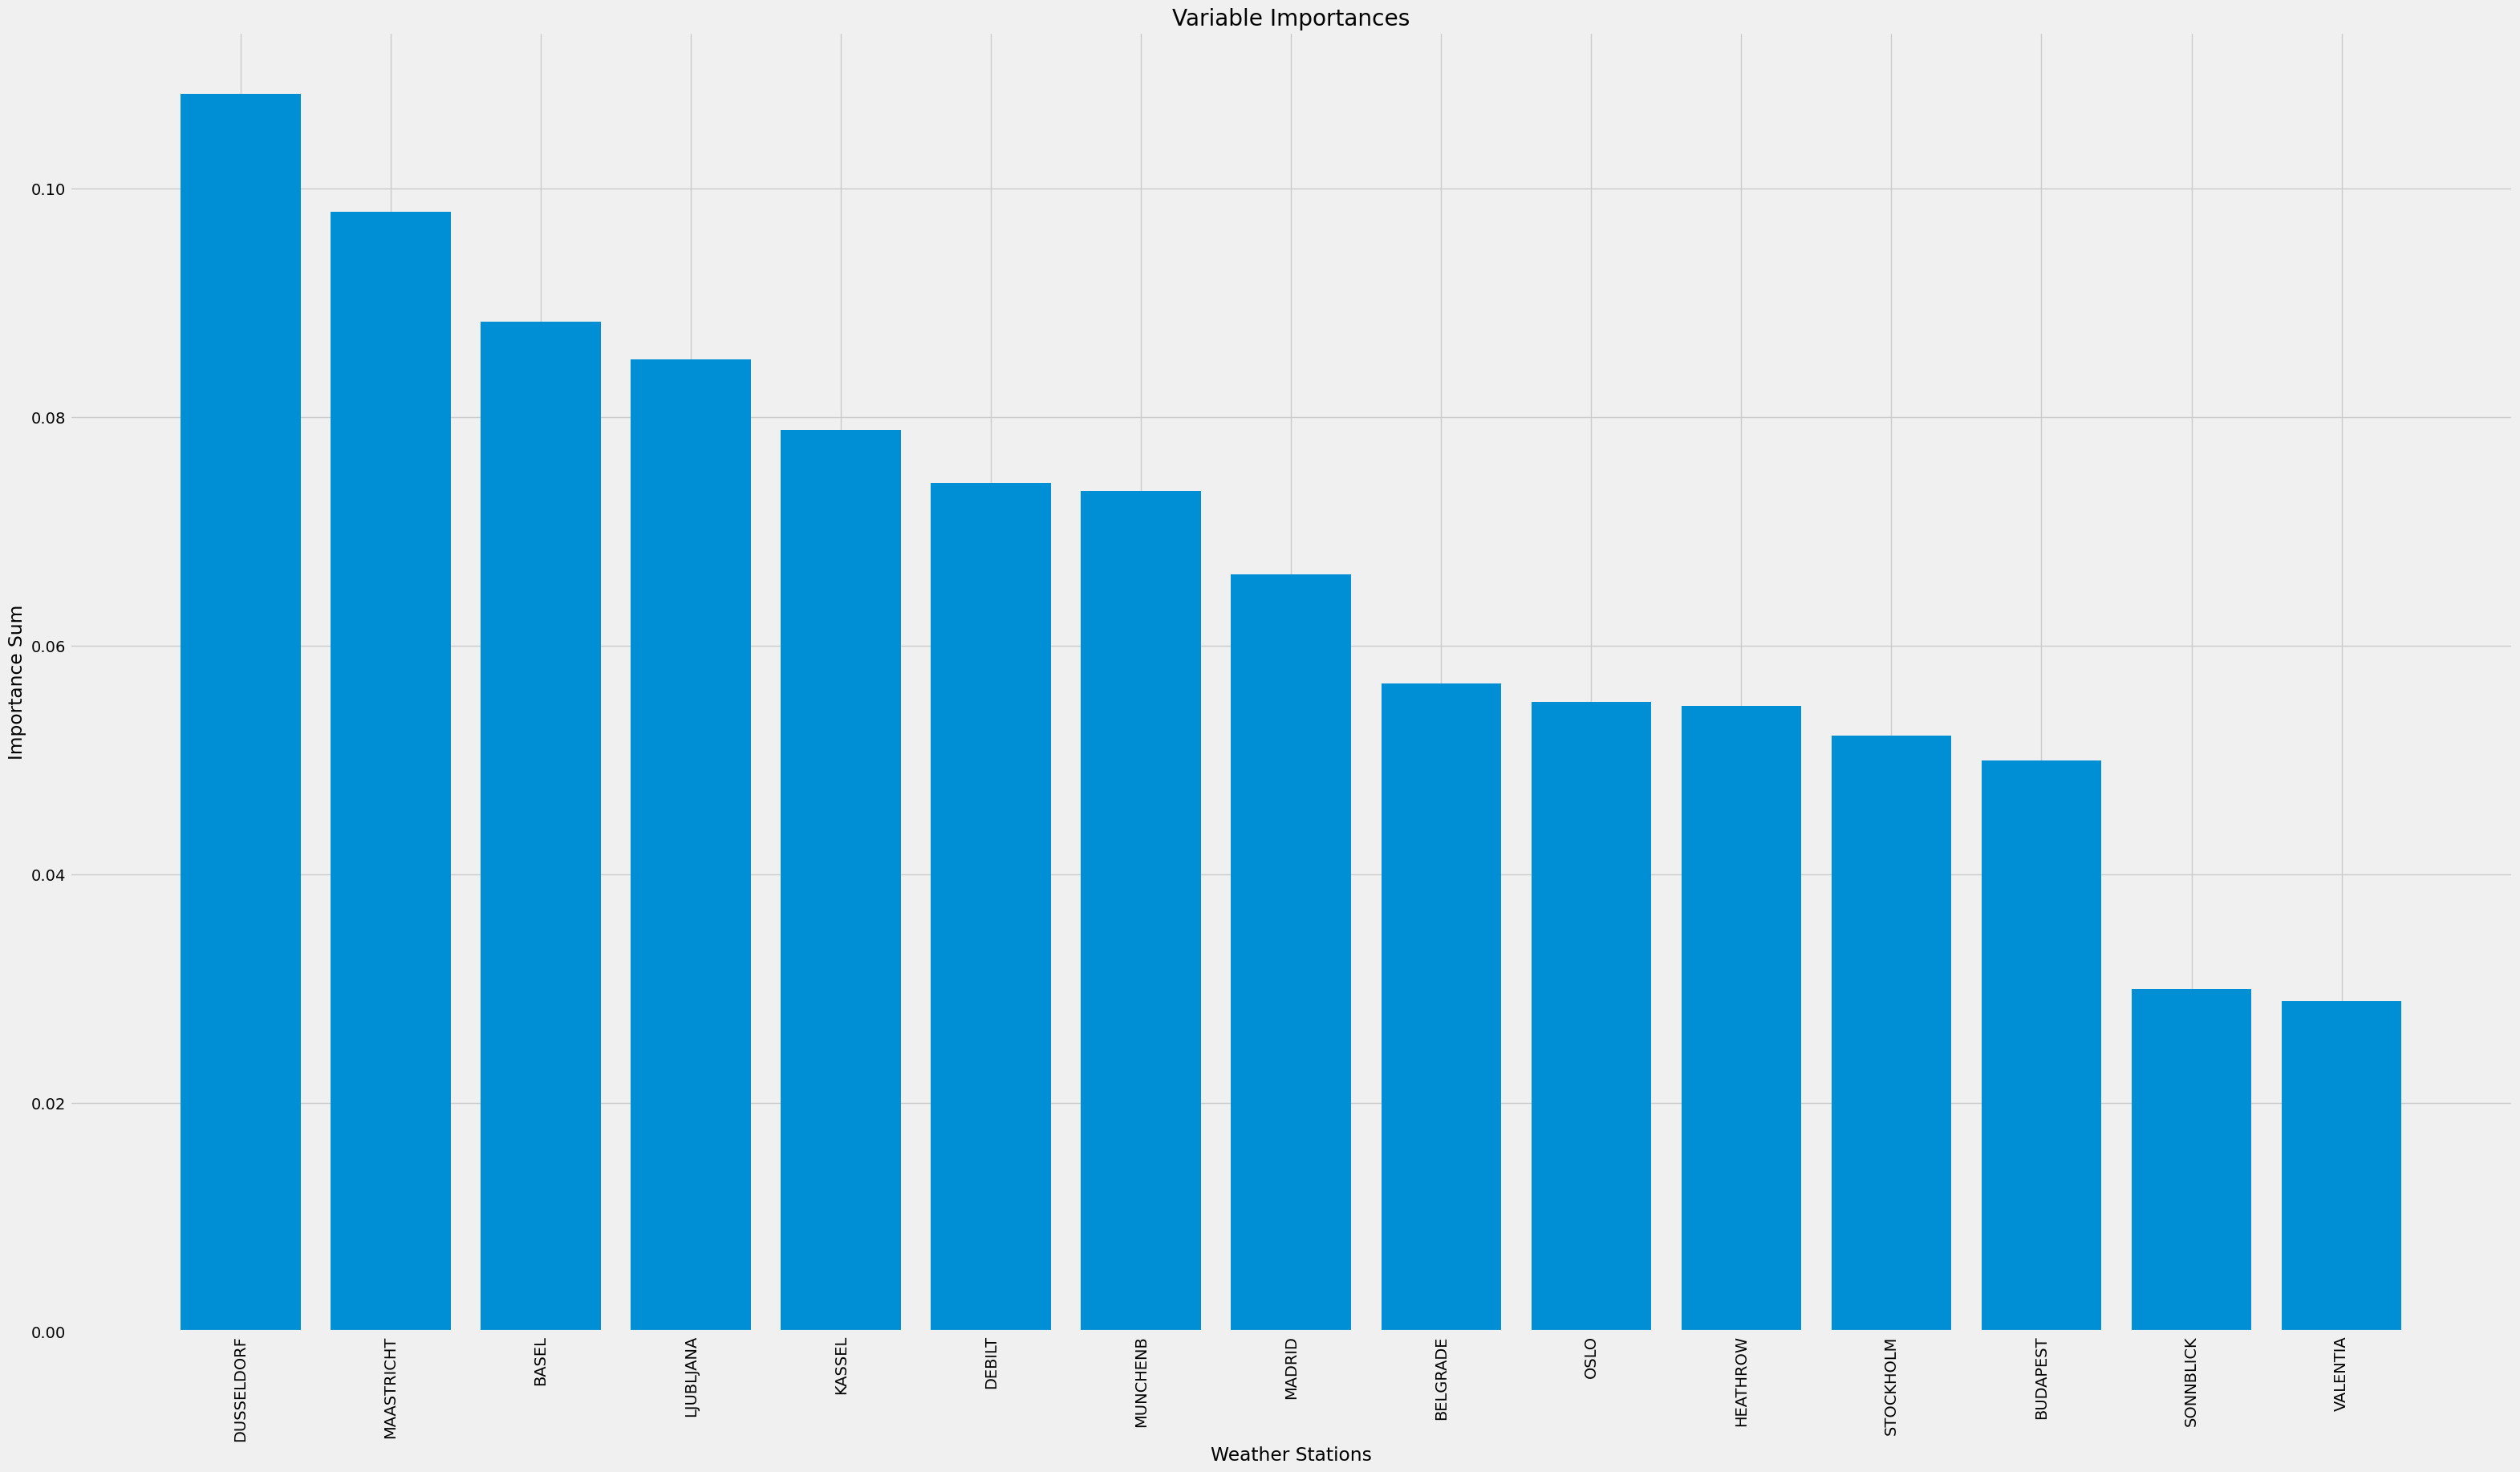

In [249]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(weather_station_importance_sum)))
weather_stations = weather_station_importance_sum.index.tolist()
importance_values = weather_station_importance_sum.values
plt.figure(figsize=(35, 20))
plt.bar(x_values, weather_station_importance_sum, orientation = 'vertical')
plt.xticks(x_values, weather_stations, rotation='vertical')
plt.ylabel('Importance Sum'); plt.xlabel('Weather Stations'); plt.title('Variable Importances');
plt.savefig("Weather Station 1960s Important Sums.png")
plt.show()

In [251]:
weather_station_importance_sum

DUSSELDORF    0.108298
MAASTRICHT    0.097956
BASEL         0.088350
LJUBLJANA     0.085042
KASSEL        0.078880
DEBILT        0.074246
MUNCHENB      0.073535
MADRID        0.066253
BELGRADE      0.056714
OSLO          0.055065
HEATHROW      0.054705
STOCKHOLM     0.052164
BUDAPEST      0.049956
SONNBLICK     0.029968
VALENTIA      0.028867
dtype: float64

##### The bar chart and the sums of all the weather stataions all correlate with each other. It appears that BASEL, KASSEL and MAASTRICHT have the more influence on the random forest when looking at the sum of importance.

In [ ]:
DUSSELDORF
MAASTRICHT
BASEL

### 4. Subset Top 3 weather stations

In [253]:
climate_dusseldorf = climate_droporder.drop(columns =['DATE',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_cloud_cover',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_humidity',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'])

In [255]:
pleasant_dusseldorf = pleasantog.drop(columns = ['DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather'])

In [257]:
climate_maastricht = climate_droporder.drop(columns =['DATE',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_cloud_cover',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_humidity',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'])

In [259]:
climate_basel = climate_droporder.drop(columns = ['DATE',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_cloud_cover',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_pressure',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_humidity',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'])

In [261]:
pleasant_basel = pleasantog.drop(columns = ['DATE',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather'])

In [263]:
pleasant_maastricht = pleasantog.drop(columns = ['DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather'])

### For the sake of needing to rerun code to make adjustments, in the next 3 Random Forests I am changing the X and y. Dusseldorf with be D and dd. Maastricht will be M and mm and Basel with be B and bb. 

### 5. Random Forest: DUSSELDORF

In [270]:
climate_dusseldorf

DUSSELDORF_cloud_cover  DUSSELDORF_humidity  DUSSELDORF_pressure  \
0                           8                 0.83               1.0161   
1                           8                 0.89               1.0161   
2                           7                 0.95               1.0161   
3                           8                 0.86               1.0161   
4                           7                 0.92               1.0161   
...                       ...                  ...                  ...   
22945                       8                 0.75               1.0214   
22946                       7                 0.71               1.0186   
22947                       8                 0.73               1.0196   
22948                       7                 0.73               1.0176   
22949                       8                 0.78               1.0184   

       DUSSELDORF_global_radiation  DUSSELDORF_precipitation  \
0                             0.12                      0.08   
1                             0.18                      0.66   
2                             0.12                      0.07   
3                             0.12                      0.02   
4                             0.12                      0.62   
...                            ...                       ...   
22945                         1.13                      0.20   
22946                         1.13                      0.20   
22947                         1.13                      0.20   
22948                         1.13                      0.20   
22949                         1.13                      0.20   

       DUSSELDORF_sunshine  DUSSELDORF_temp_mean  DUSSELDORF_temp_min  \
0                      0.0                  10.0                  7.0   
1                      0.5                   8.2                  7.4   
2                      0.0                   7.1                  6.9   
3                      0.0                   6.8                  3.6   
4                      0.0                   7.7                  6.2   
...                    ...                   ...                  ...   
22945                  6.4                  17.8                 13.6   
22946                  4.9                  19.4                 15.4   
22947                  4.0                  18.2                 13.4   
22948                  6.9                  16.7                 11.9   
22949                  1.7                  15.2                  9.7   

       DUSSELDORF_temp_max  
0                     11.5  
1                     11.0  
2                      9.1  
3                      8.0  
4                     11.0  
...                    ...  
22945                 21.4  
22946                 23.9  
22947                 22.0  
22948                 21.1  
22949                 19.5  

[22950 rows x 9 columns]

In [272]:
climate_dusseldorf.shape

(22950, 9)

In [274]:
pleasant_dusseldorf

DUSSELDORF_pleasant_weather
0                                0
1                                0
2                                0
3                                0
4                                0
...                            ...
22945                            0
22946                            0
22947                            0
22948                            0
22949                            0

[22950 rows x 1 columns]

In [276]:
pleasant_dusseldorf.shape

(22950, 1)

In [280]:
# Create an 'X' matrix for Kassel RF

D = climate_dusseldorf
dd = pleasant_dusseldorf

In [282]:
D.shape

(22950, 9)

In [284]:
dd.shape

(22950, 1)

In [288]:
# Changing data from DataFrame to Numpy Array

D = np.array(D.iloc[:,D.columns!=135])
d = np.array(dd)

In [290]:
D

array([[ 8.    ,  0.83  ,  1.0161, ..., 10.    ,  7.    , 11.5   ],
       [ 8.    ,  0.89  ,  1.0161, ...,  8.2   ,  7.4   , 11.    ],
       [ 7.    ,  0.95  ,  1.0161, ...,  7.1   ,  6.9   ,  9.1   ],
       ...,
       [ 8.    ,  0.73  ,  1.0196, ..., 18.2   , 13.4   , 22.    ],
       [ 7.    ,  0.73  ,  1.0176, ..., 16.7   , 11.9   , 21.1   ],
       [ 8.    ,  0.78  ,  1.0184, ..., 15.2   ,  9.7   , 19.5   ]])

In [292]:
d

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [294]:
# Train & Test Split

D_train, D_test, dd_train, dd_test = train_test_split(D,dd,test_size=0.2)

In [296]:
# Train and Test Split Shapes

print(D_train.shape, dd_train.shape)
print(D_test.shape, dd_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [298]:
# Creating a RandomForest classifier

clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

# Training the model on the training dataset
# Fit function is used to train the model using the training sets as parameters

clf.fit(D_train, dd_train)

C:\Users\jmesi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [308]:
# Performing predictions on the test dataset

dd_pred = clf.predict(D_test)
# Using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(dd_test, dd_pred))

Model Accuracy:  1.0


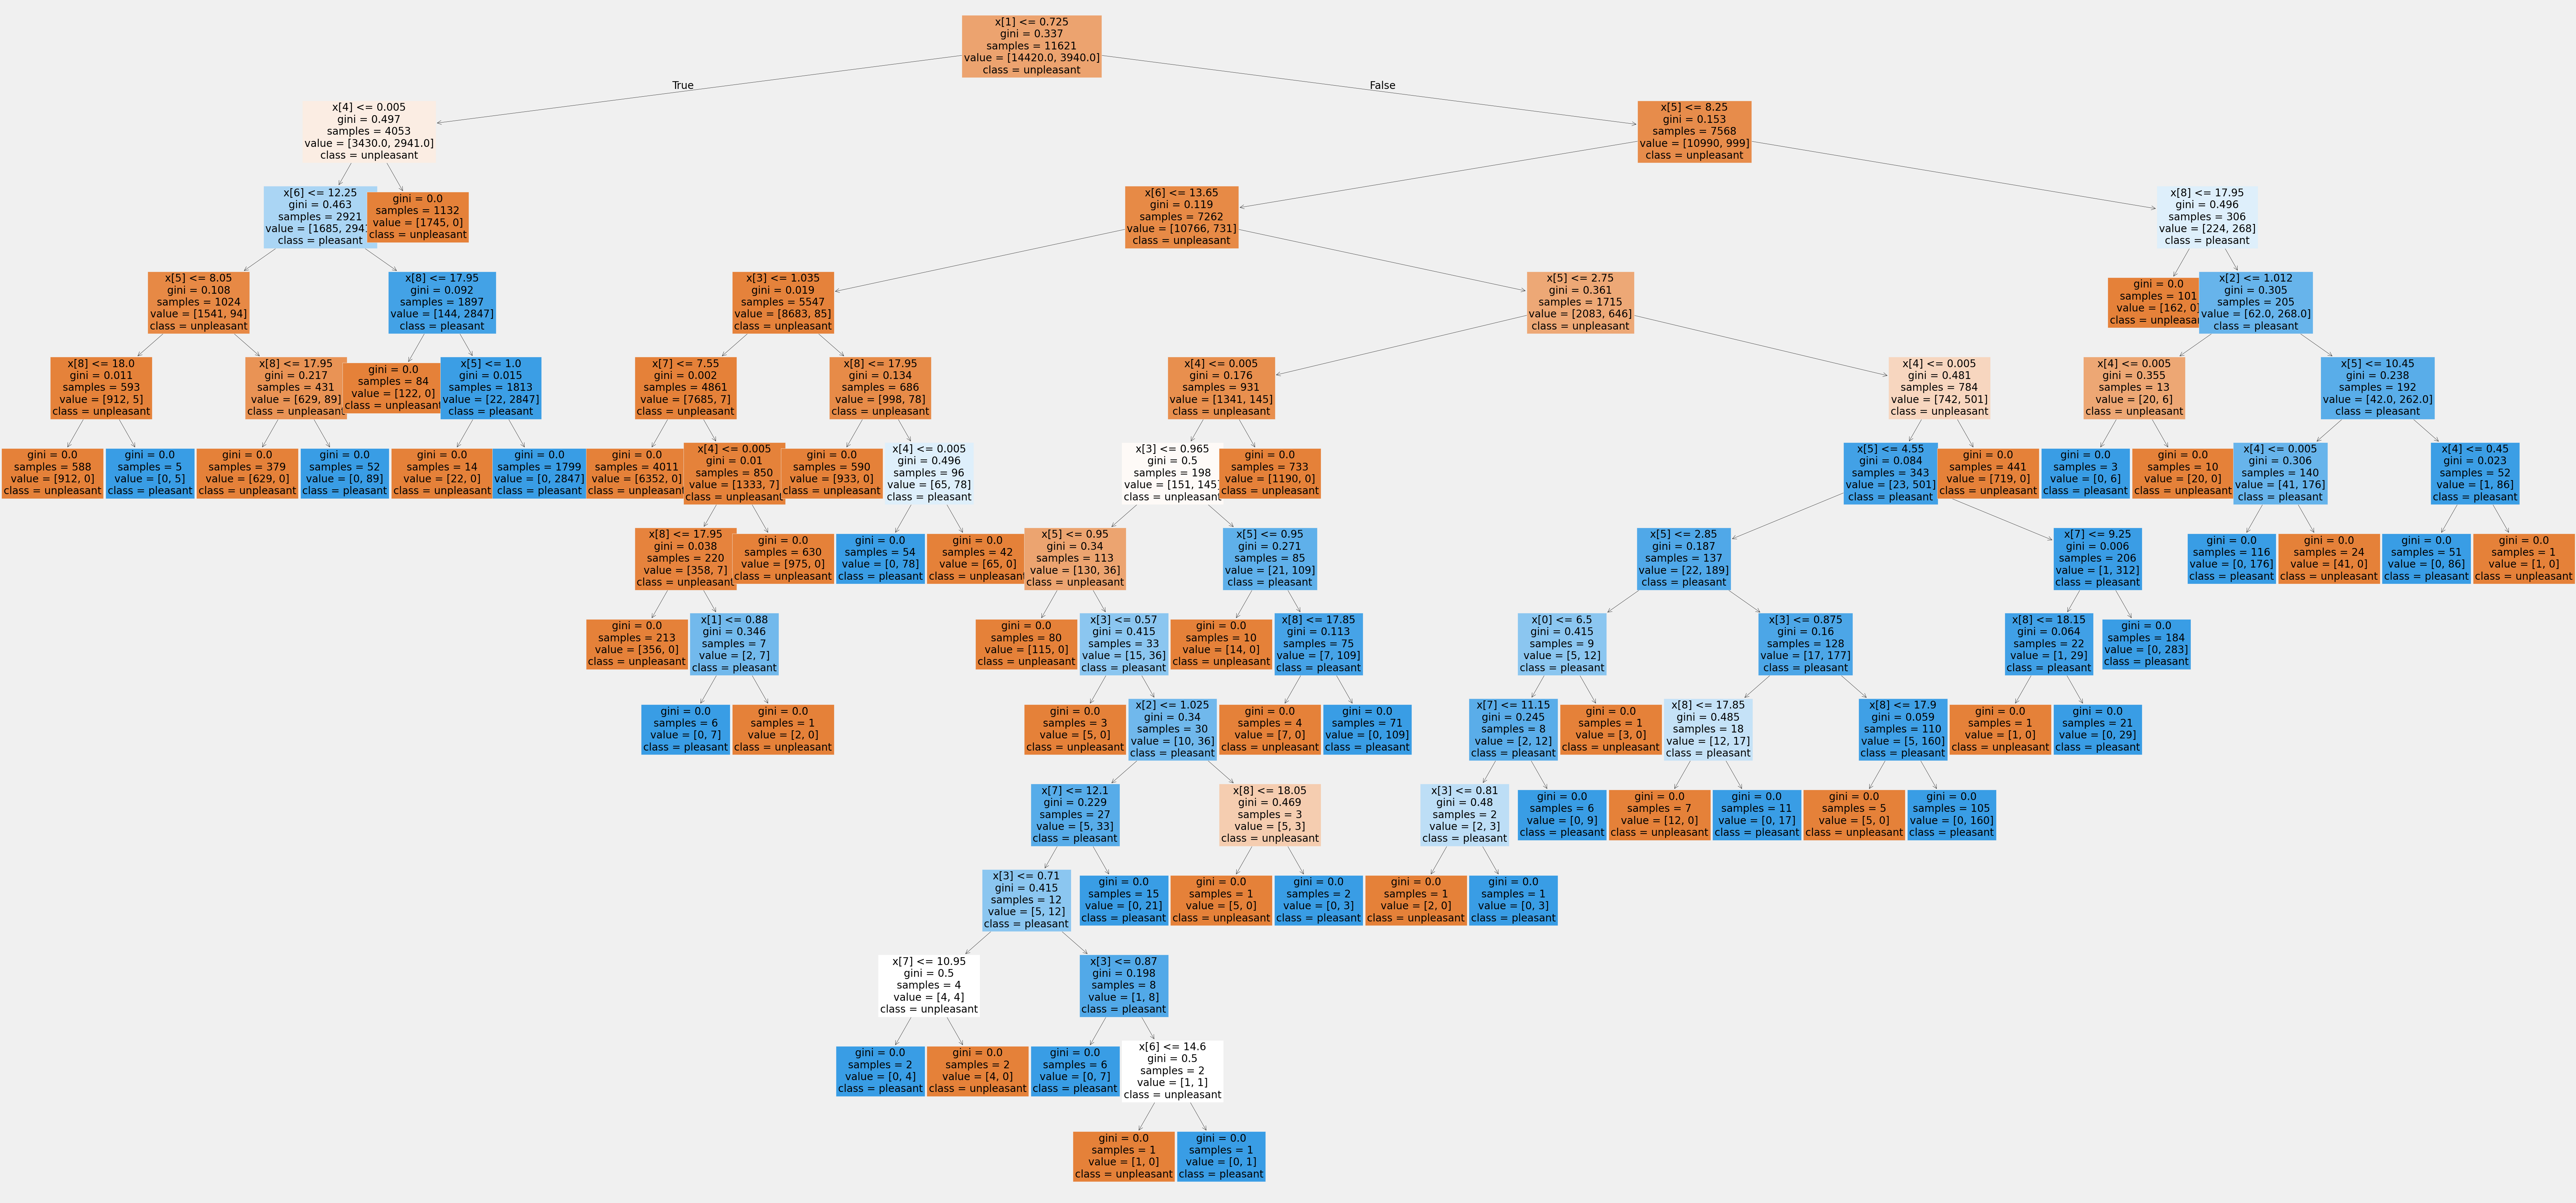

In [310]:
types = {0:'unpleasant', 1:'pleasant'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=types, filled=True);
fig.savefig("Climate_Dusseldorf Random Forest.png")
plt.show()

In [312]:
dusseldorf_features = climate_dusseldorf.columns.tolist()

In [314]:
dusseldorf_features

['DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max']

In [316]:
# Creating a list of features importance

important = pd.Series(clf.feature_importances_, index = dusseldorf_features)
important.sort_values(ascending=False)

DUSSELDORF_precipitation       0.348972
DUSSELDORF_temp_max            0.231966
DUSSELDORF_temp_mean           0.131520
DUSSELDORF_global_radiation    0.104448
DUSSELDORF_sunshine            0.089203
DUSSELDORF_cloud_cover         0.035935
DUSSELDORF_temp_min            0.030351
DUSSELDORF_humidity            0.016428
DUSSELDORF_pressure            0.011177
dtype: float64

In [318]:
dusseldorf_sum = {
    'DUSSELDORF': DUSSELDORF.sum()}

In [320]:
dusseldorf_sum

{'DUSSELDORF': 0.10829766769077326}

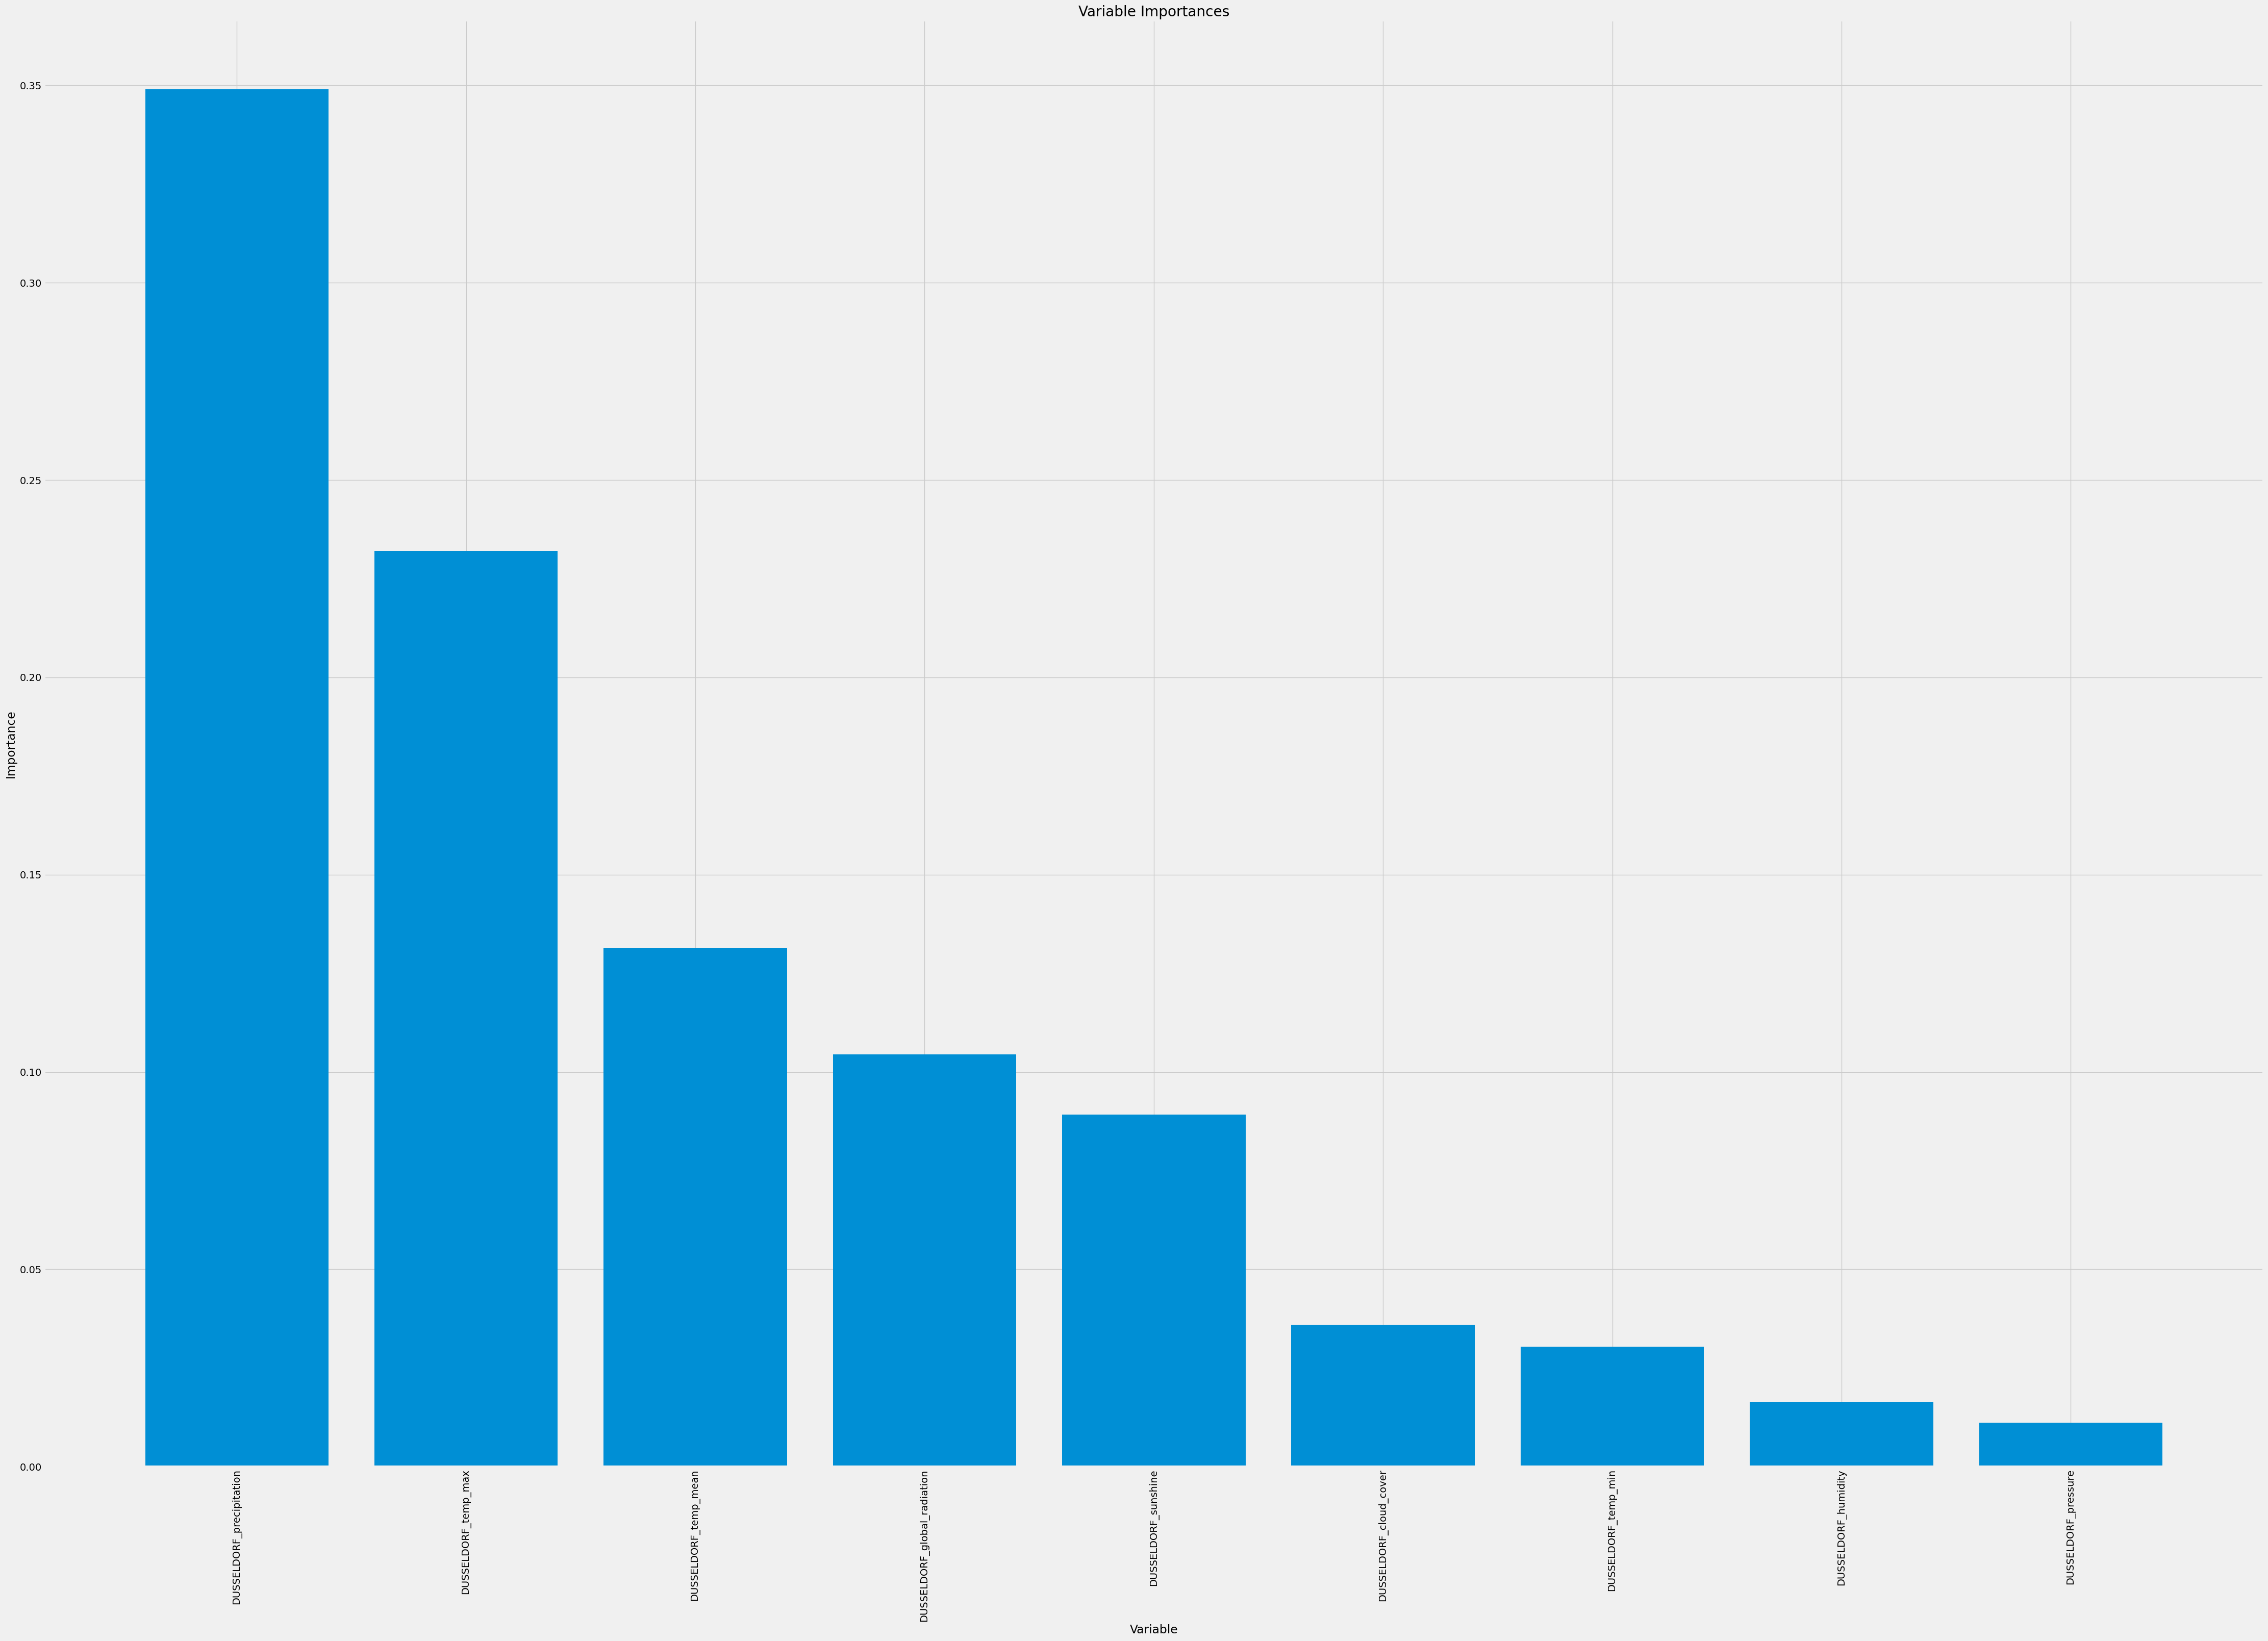

In [322]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(dusseldorf_features)))
plt.figure(figsize=(50,35))
plt.bar(x_values, important.sort_values(ascending=False), orientation = 'vertical')
plt.xticks(x_values, important.sort_values(ascending=False).index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.savefig("Dusseldorf Weather Importance Bar Graph.png")
plt.show()

##### For Dusseldorf Precipitation has the most influence on the feature importance. Temperature Max is the second most important but Temperature mean is less than half having less influence than the top two features.

### 6. Random Forest: MAASTRICHT

In [325]:
climate_maastricht

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                           7                 0.83               1.0063   
1                           8                 0.92               1.0062   
2                           7                 0.97               1.0167   
3                           7                 0.89               1.0277   
4                           7                 0.92               1.0259   
...                       ...                  ...                  ...   
22945                       8                 0.67               1.0201   
22946                       7                 0.70               1.0190   
22947                       8                 0.69               1.0183   
22948                       8                 0.73               1.0181   
22949                       8                 0.80               1.0160   

       MAASTRICHT_global_radiation  MAASTRICHT_precipitation  \
0                             0.22                      0.32   
1                             0.17                      1.34   
2                             0.12                      0.46   
3                             0.16                      0.00   
4                             0.12                      0.56   
...                            ...                       ...   
22945                         1.17                      0.20   
22946                         1.17                      0.20   
22947                         1.17                      0.20   
22948                         1.17                      0.20   
22949                         1.17                      0.20   

       MAASTRICHT_sunshine  MAASTRICHT_temp_mean  MAASTRICHT_temp_min  \
0                      1.0                   9.5                  8.5   
1                      0.4                   8.6                  7.5   
2                      0.0                   6.9                  5.5   
3                      0.3                   7.0                  3.0   
4                      0.0                   8.1                  2.5   
...                    ...                   ...                  ...   
22945                  5.3                  18.6                 14.1   
22946                  5.0                  18.9                 15.8   
22947                  3.2                  18.2                 13.7   
22948                  6.8                  16.3                 12.8   
22949                  3.0                  15.3                 11.0   

       MAASTRICHT_temp_max  
0                     11.1  
1                      9.9  
2                      9.9  
3                     10.0  
4                     11.1  
...                    ...  
22945                 22.6  
22946                 23.5  
22947                 24.3  
22948                 21.4  
22949                 19.4  

[22950 rows x 9 columns]

In [327]:
climate_maastricht.shape

(22950, 9)

In [329]:
pleasant_maastricht

MAASTRICHT_pleasant_weather
0                                0
1                                0
2                                0
3                                0
4                                0
...                            ...
22945                            0
22946                            0
22947                            0
22948                            0
22949                            0

[22950 rows x 1 columns]

In [331]:
pleasant_maastricht.shape

(22950, 1)

In [333]:
# Create an 'X' matrix for Maastricht RF

M = climate_maastricht
mm = pleasant_maastricht

In [335]:
M.shape

(22950, 9)

In [337]:
mm.shape

(22950, 1)

In [339]:
# Changing data from DataFrame to Numpy Array

M = np.array(M.iloc[:,M.columns!=135])
m = np.array(mm)

In [341]:
M

array([[ 7.    ,  0.83  ,  1.0063, ...,  9.5   ,  8.5   , 11.1   ],
       [ 8.    ,  0.92  ,  1.0062, ...,  8.6   ,  7.5   ,  9.9   ],
       [ 7.    ,  0.97  ,  1.0167, ...,  6.9   ,  5.5   ,  9.9   ],
       ...,
       [ 8.    ,  0.69  ,  1.0183, ..., 18.2   , 13.7   , 24.3   ],
       [ 8.    ,  0.73  ,  1.0181, ..., 16.3   , 12.8   , 21.4   ],
       [ 8.    ,  0.8   ,  1.016 , ..., 15.3   , 11.    , 19.4   ]])

In [343]:
mm

MAASTRICHT_pleasant_weather
0                                0
1                                0
2                                0
3                                0
4                                0
...                            ...
22945                            0
22946                            0
22947                            0
22948                            0
22949                            0

[22950 rows x 1 columns]

In [345]:
# Train & Test Split

M_train, M_test, mm_train, mm_test = train_test_split(M,mm,test_size=0.2)

In [347]:
# Train and Test Split Shapes

print(M_train.shape, mm_train.shape)
print(M_test.shape, mm_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [349]:
# Creating a RandomForest classifier

clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

# Training the model on the training dataset
# Fit function is used to train the model using the training sets as parameters

clf.fit(M_train, mm_train)

C:\Users\jmesi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [351]:
# Performing predictions on the test dataset

mm_pred = clf.predict(M_test)
# Using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(mm_test, mm_pred))

Model Accuracy:  1.0


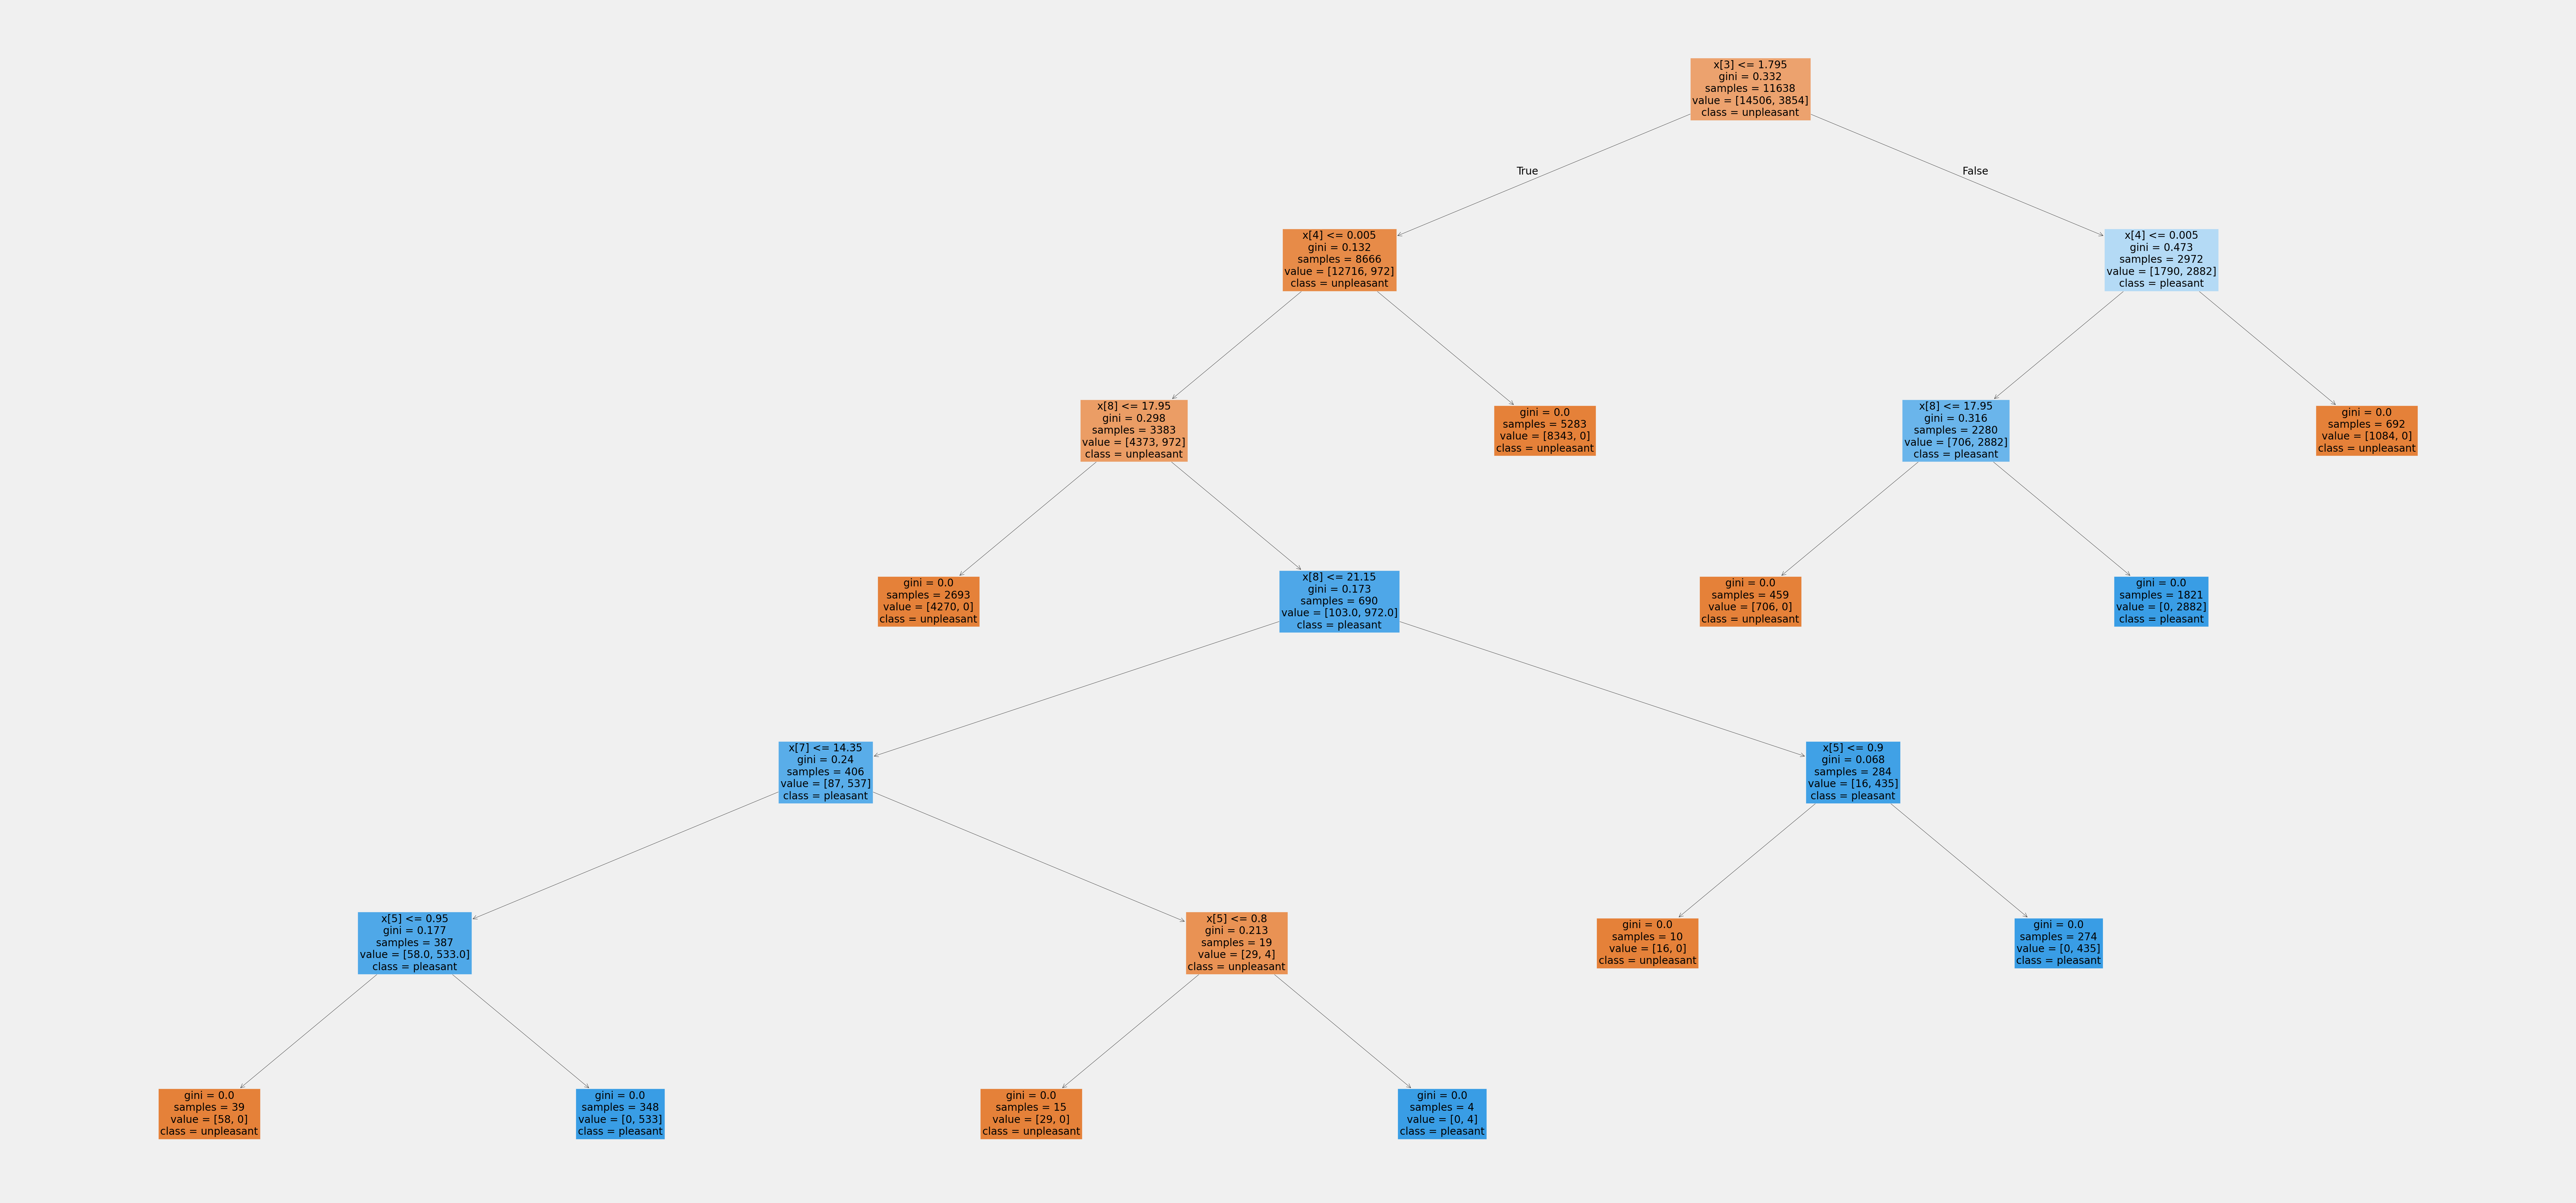

In [353]:
types = {0:'unpleasant', 1:'pleasant'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=types, filled=True);
fig.savefig("Climate_Maastricht Random Forest.png")
plt.show()

In [355]:
maastricht_features = climate_maastricht.columns.tolist()   

In [357]:
maastricht_features

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

In [359]:
# Creating a list of features importance

important = pd.Series(clf.feature_importances_, index = maastricht_features)
important.sort_values(ascending=False)

MAASTRICHT_precipitation       0.318355
MAASTRICHT_temp_max            0.297020
MAASTRICHT_temp_mean           0.130205
MAASTRICHT_global_radiation    0.091165
MAASTRICHT_sunshine            0.074430
MAASTRICHT_cloud_cover         0.037596
MAASTRICHT_humidity            0.022949
MAASTRICHT_temp_min            0.017309
MAASTRICHT_pressure            0.010972
dtype: float64

In [361]:
maastricht_sum = {
    'MAASTRICHT': MAASTRICHT.sum()}

In [363]:
maastricht_sum 

{'MAASTRICHT': 0.09795604435275818}

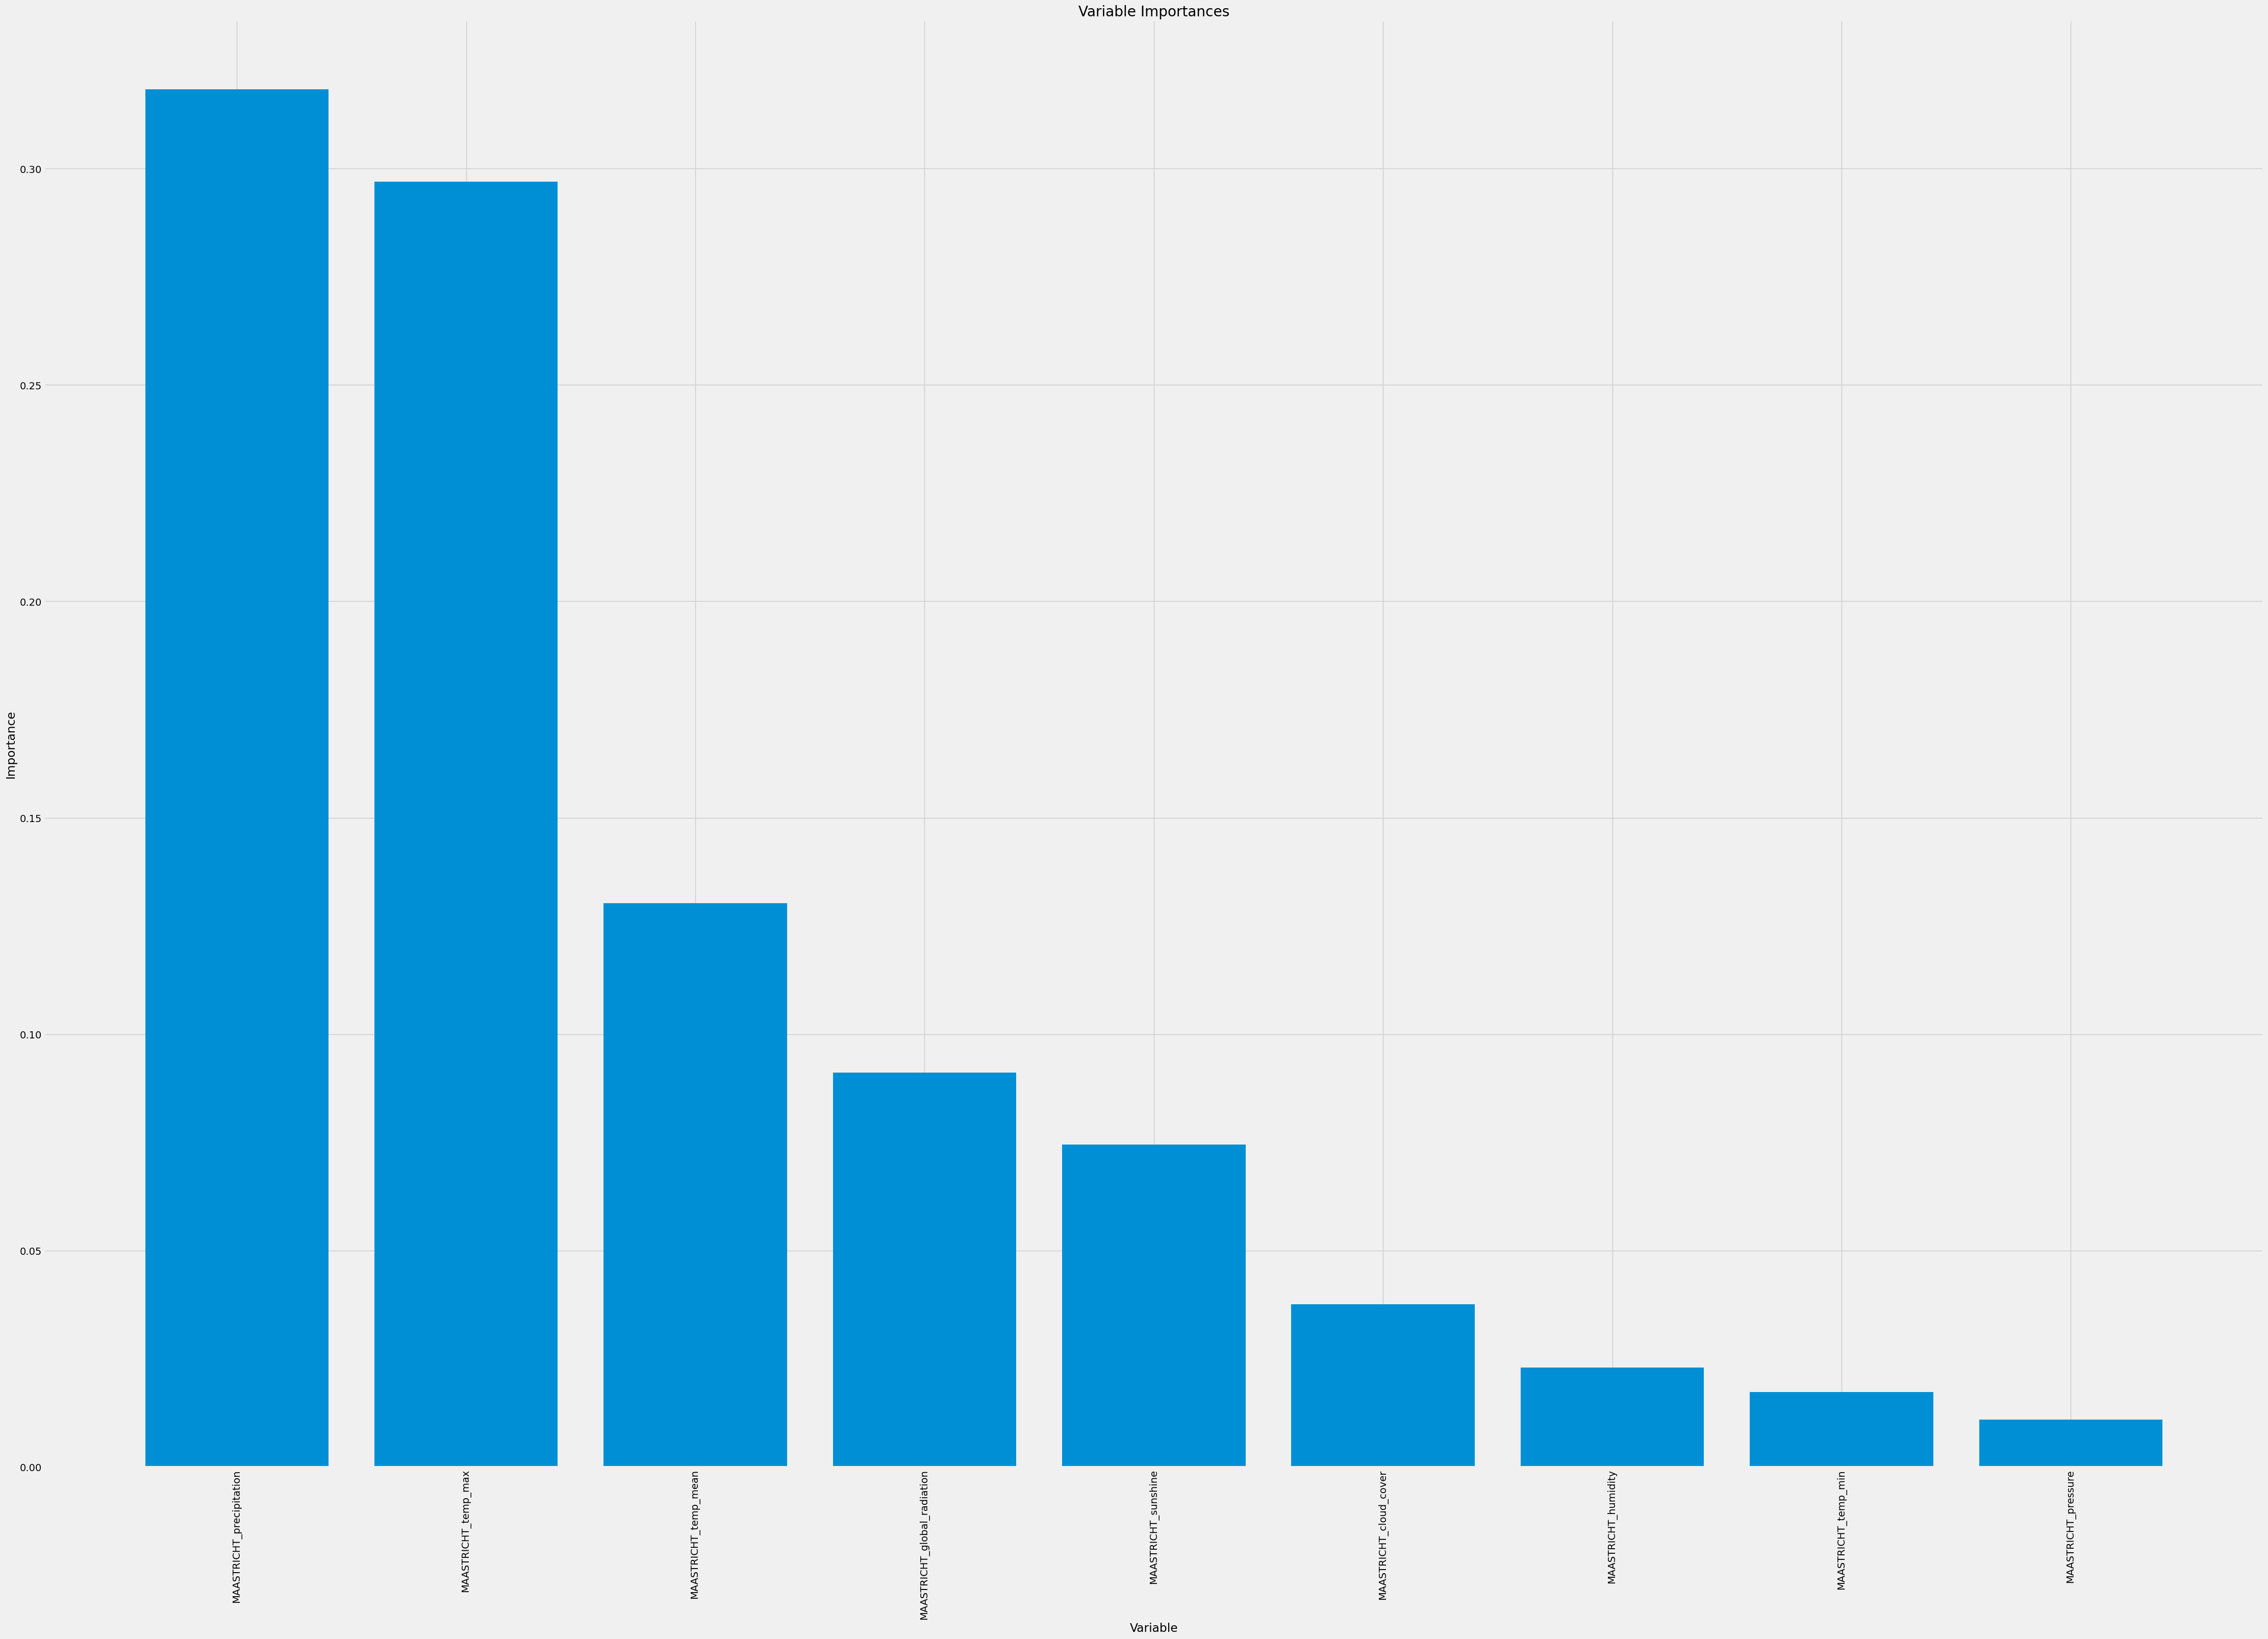

In [365]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(maastricht_features)))
plt.figure(figsize=(50,35))
plt.bar(x_values, important.sort_values(ascending=False), orientation = 'vertical')
plt.xticks(x_values, important.sort_values(ascending=False).index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.savefig("Maastricht Weather Importance Bar Graph.png")
plt.show()

##### For Maastricht the observations that are more important are Precipitation and Temperature Max. Temp Mean drops by half and doesn't have that much influence.

### 7. Random Forest: BASEL

In [368]:
climate_basel

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  
0                  6.5             0.8            10.9  
1                  6.1             3.3            10.1  
2                  8.5             5.1             9.9  
3                  6.3             3.8            10.6  
4                  3.0            -0.7             6.0  
...                ...             ...             ...  
22945             15.9            11.4            21.4  
22946             16.7            14.3            21.9  
22947             16.7            13.1            22.4  
22948             15.4            11.6            21.1  
22949             13.5             9.9            19.2  

[22950 rows x 9 columns]

In [370]:
climate_basel.shape

(22950, 9)

In [372]:
pleasant_basel

BASEL_pleasant_weather
0                           0
1                           0
2                           0
3                           0
4                           0
...                       ...
22945                       0
22946                       0
22947                       0
22948                       0
22949                       0

[22950 rows x 1 columns]

In [374]:
pleasant_basel.shape

(22950, 1)

In [376]:
# Create an 'X' matrix for Basel RF

B = climate_basel
bb = pleasant_basel

In [378]:
B.shape

(22950, 9)

In [380]:
bb.shape

(22950, 1)

In [382]:
# Changing data from DataFrame to Numpy Array

B = np.array(B.iloc[:,B.columns!=135])
bb = np.array(bb)

In [384]:
B

array([[ 7.    ,  0.85  ,  1.018 , ...,  6.5   ,  0.8   , 10.9   ],
       [ 6.    ,  0.84  ,  1.018 , ...,  6.1   ,  3.3   , 10.1   ],
       [ 8.    ,  0.9   ,  1.018 , ...,  8.5   ,  5.1   ,  9.9   ],
       ...,
       [ 4.    ,  0.76  ,  1.0227, ..., 16.7   , 13.1   , 22.4   ],
       [ 5.    ,  0.8   ,  1.0212, ..., 15.4   , 11.6   , 21.1   ],
       [ 5.    ,  0.84  ,  1.0193, ..., 13.5   ,  9.9   , 19.2   ]])

In [386]:
bb

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [388]:
# Train & Test Split

B_train, B_test, bb_train, bb_test = train_test_split(B,bb,test_size=0.2)

In [390]:
# Train and Test Split Shapes

print(B_train.shape, bb_train.shape)
print(B_test.shape, bb_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [392]:
# Creating a RandomForest classifier

clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

# Training the model on the training dataset
# Fit function is used to train the model using the training sets as parameters

clf.fit(B_train, bb_train)

C:\Users\jmesi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [394]:
# Performing predictions on the test dataset

bb_pred = clf.predict(B_test)
# Using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(bb_test, bb_pred))

Model Accuracy:  1.0


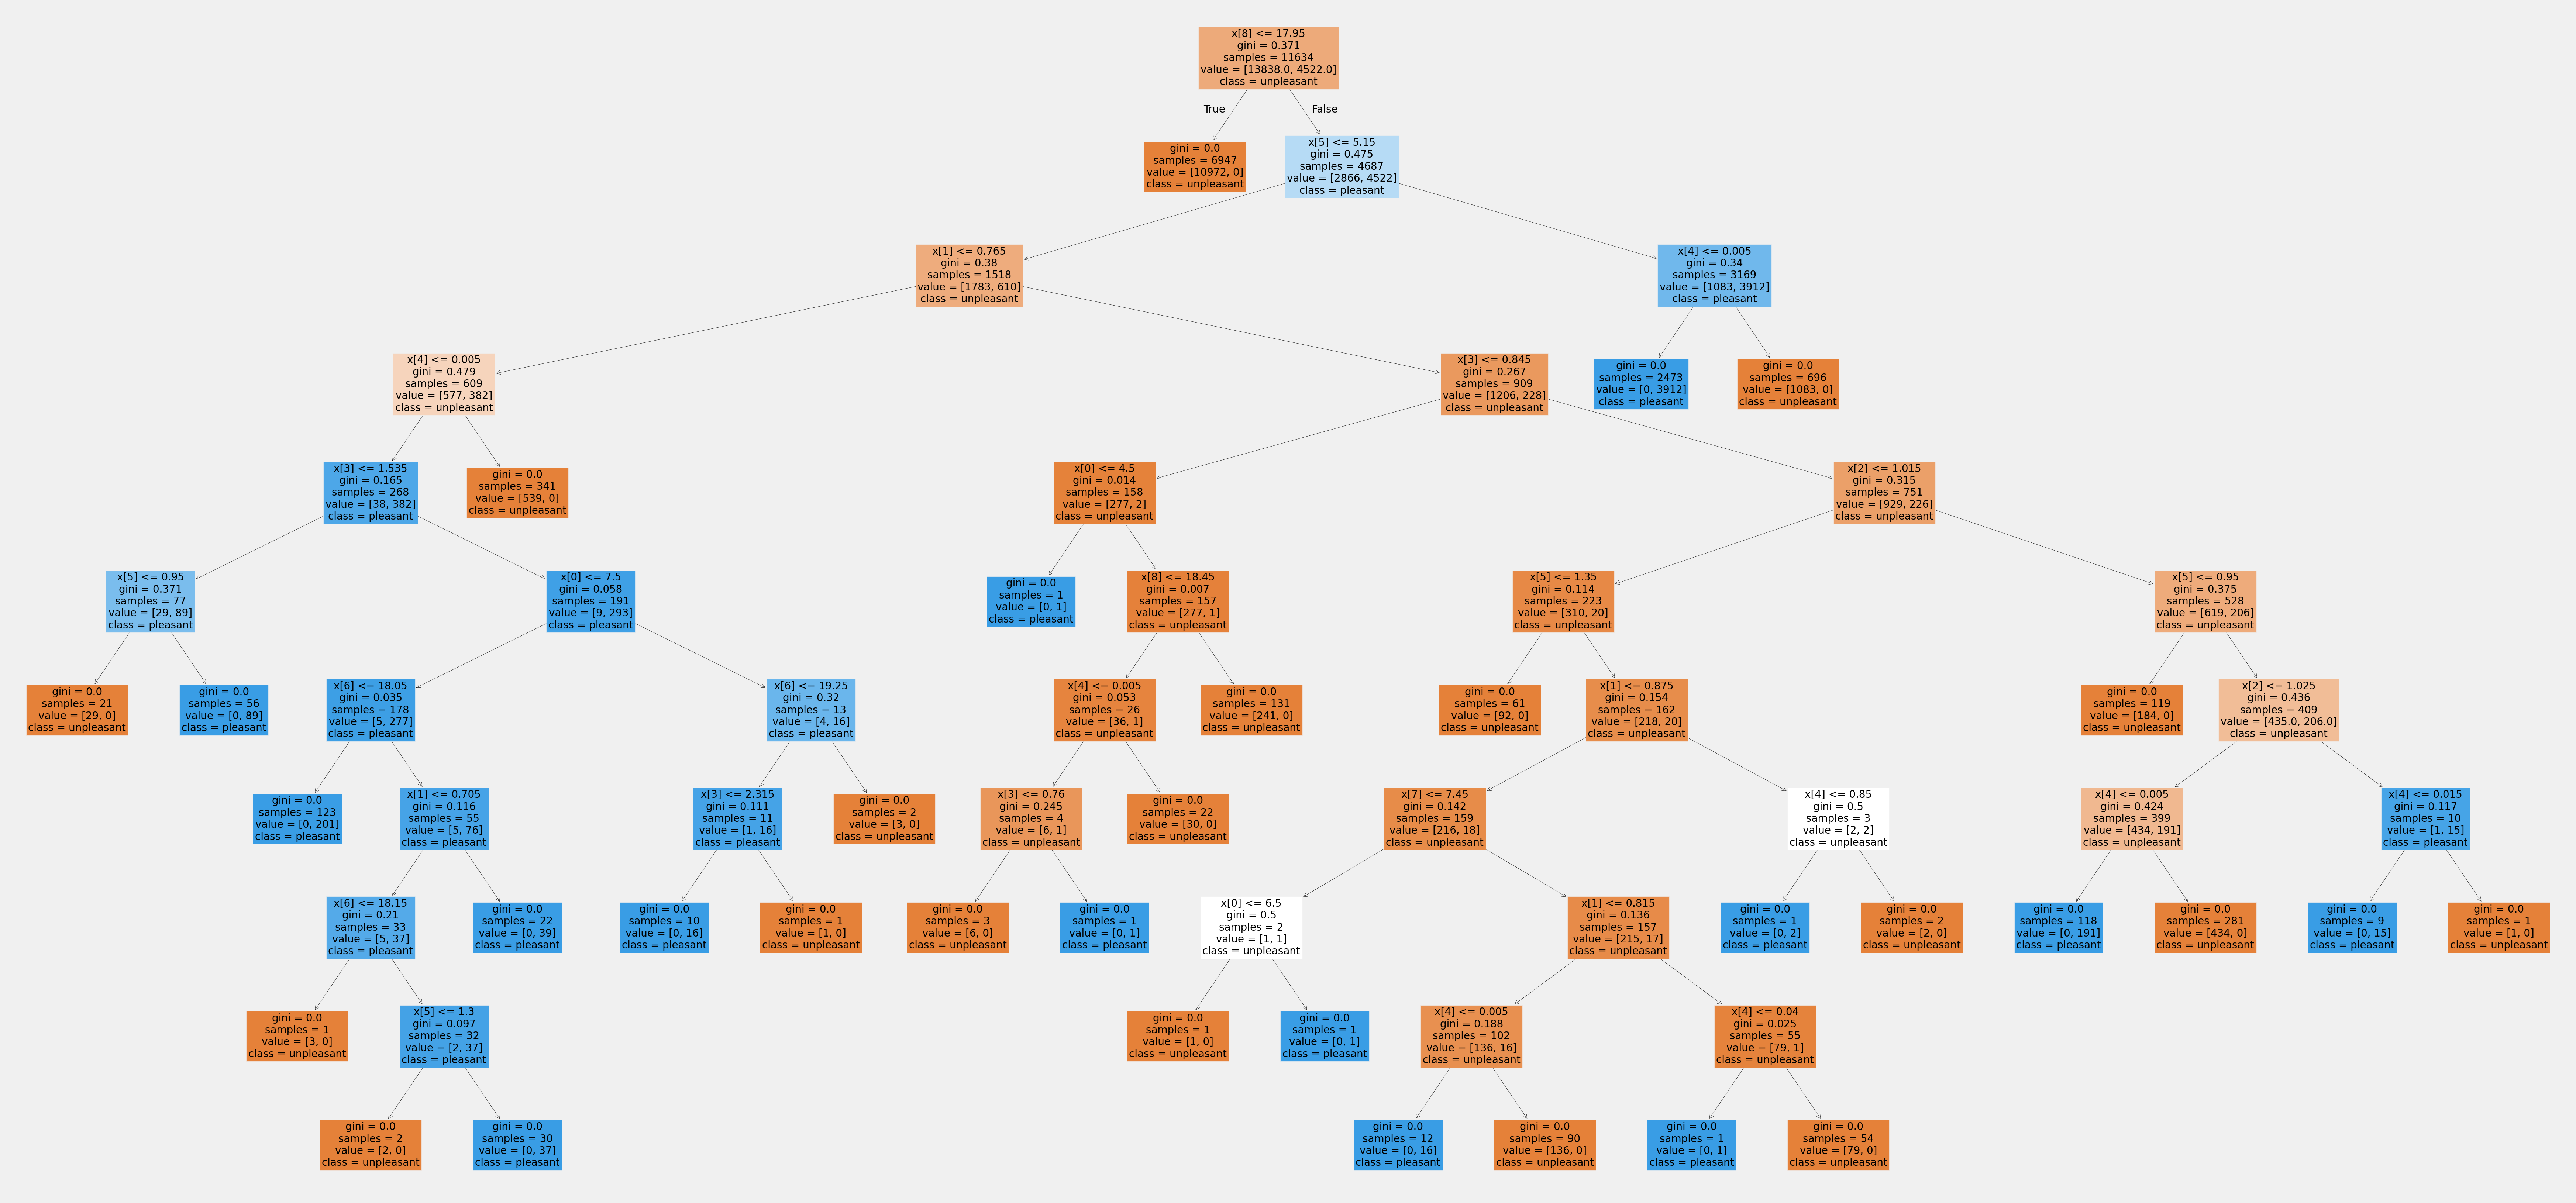

In [396]:
types = {0:'unpleasant', 1:'pleasant'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=types, filled=True);
fig.savefig("Climate_Basel Random Forest.png")
plt.show()

In [398]:
basel_features = climate_basel.columns.tolist()

In [400]:
basel_features

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [402]:
# Creating a list of features importance

important = pd.Series(clf.feature_importances_, index = basel_features)
important.sort_values(ascending=False)

BASEL_precipitation       0.350921
BASEL_temp_max            0.267804
BASEL_global_radiation    0.116226
BASEL_sunshine            0.104025
BASEL_temp_mean           0.078280
BASEL_temp_min            0.039065
BASEL_cloud_cover         0.024233
BASEL_humidity            0.011451
BASEL_pressure            0.007996
dtype: float64

In [423]:
basel_sum = {
    'BASEL': BASEL.sum()}

In [425]:
basel_sum

{'BASEL': 0.0883496021719356}

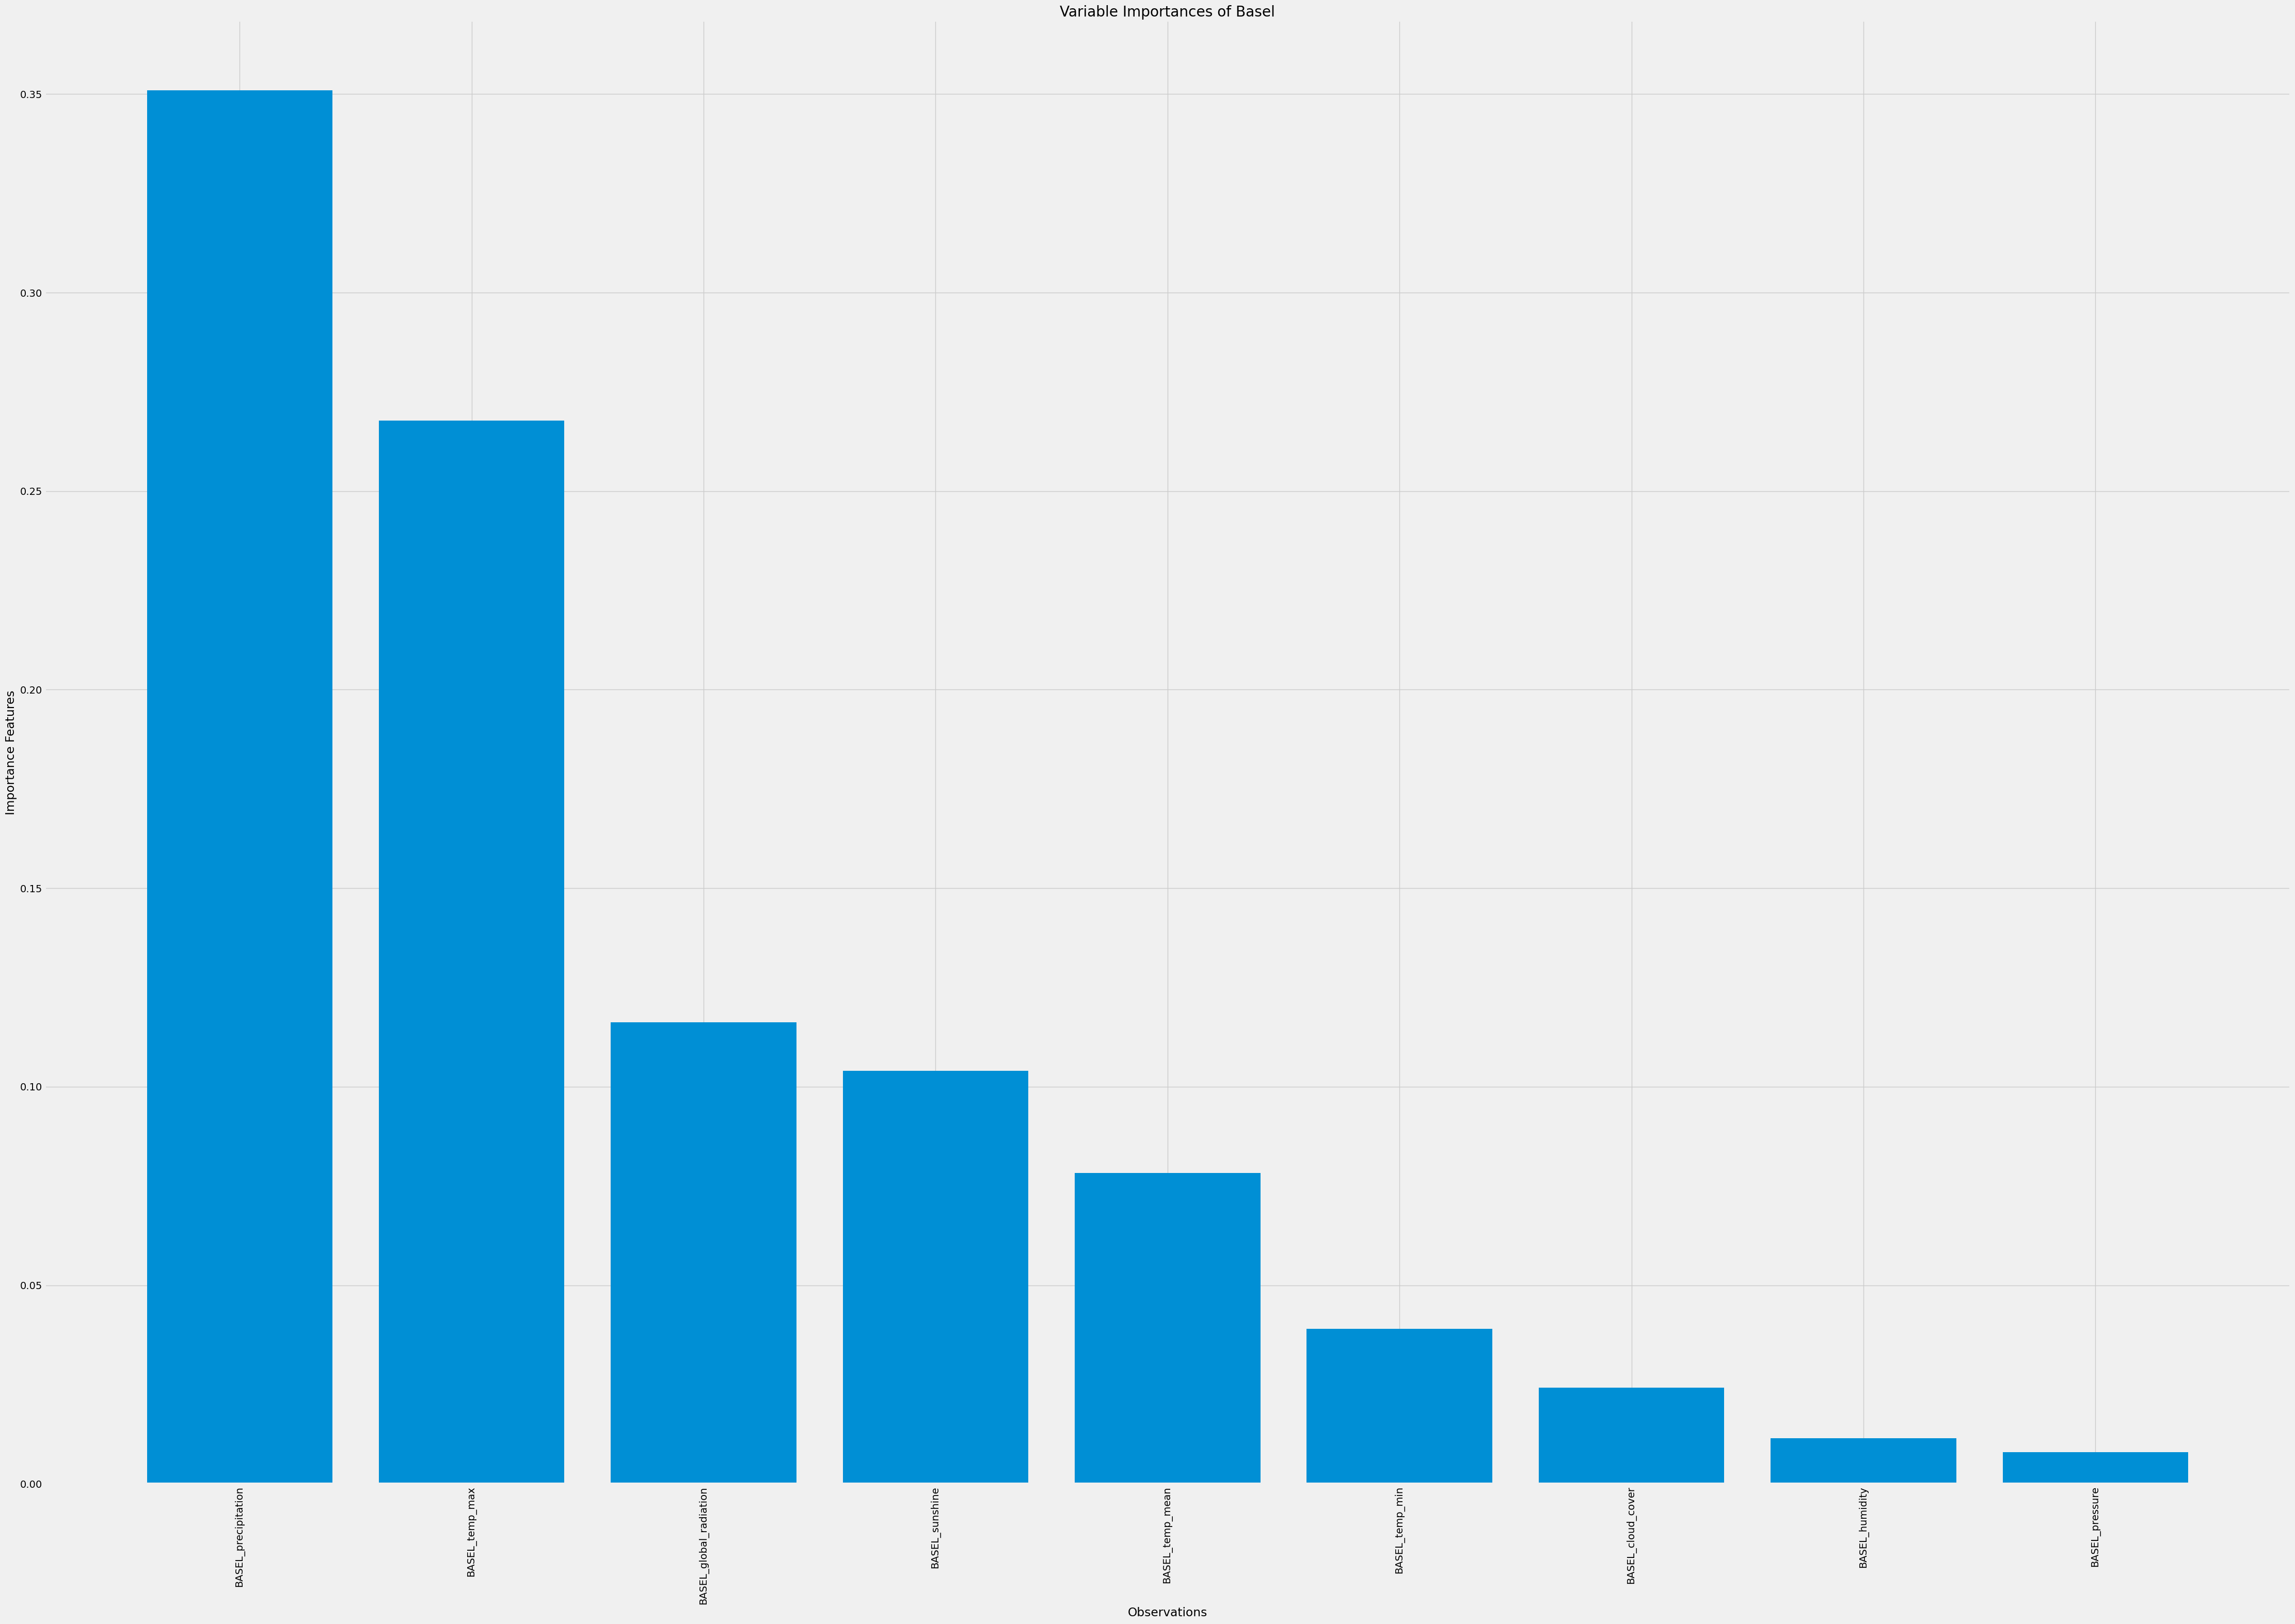

In [404]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(basel_features)))
plt.figure(figsize=(50,35))
plt.bar(x_values, important.sort_values(ascending=False), orientation = 'vertical')
plt.xticks(x_values, important.sort_values(ascending=False).index, rotation='vertical')
plt.ylabel('Importance Features'); plt.xlabel('Observations'); plt.title('Variable Importances of Basel');
plt.savefig("Basel Weather Importance Bar Graph.png")
plt.show()

##### For Basel Precipitation and Temperature max hold the highest influences. Surpisingly compared to Maastricht and Dusseldorf, Basel has Global Radiation as it's third feature although, it's not as strong as an influencer. 

In [ ]:
---- ClimateWins wants to know which indicators from which weather stations are most important in determining whether a day will be pleasant or not. Given your results, write a paragraph on which indicators might be more important in terms of predicting future weather events or investing in new climate-tracking equipment. In working on these aspects, you’ll fine-tune certain soft skills, such as decision-making and problem-solving, which will come in handy on the job!

### 8. Export


In [412]:
climate_droporder.to_csv(os.path.join(path,'ClimateWins', 'Unsupervised Learning', 'ML2_2.3_Climate.csv'))

In [417]:
pleasantog.to_csv(os.path.join(path,'ClimateWins', 'Unsupervised Learning', 'ML2_2.3_Pleasant.csv'))